# Ground water level prediction

## Mst Nazneen Aktar
## Md. Abdullah-Al Mamun

# 1. Introduction

## About the dataset


Data collected from meteorological stations in Rangpur, Nilphamari, and Dinajpur was obtained from various sources, including the Bangladesh Meteorological Department (BMD), Bangladesh Water Development Board (BWDB), Food and Agricultural Organization (FAO), National Oceanic and Atmospheric Association (NOAA) Climate Prediction Center (CPC), Bangladesh Bureau of Statistics, and National Aeronautics and Space Administration (NASA). Additionally, monthly groundwater level (GWL) data for 12 selected wells was acquired from the Bangladesh Water Development Board (BWDB). The MODIS data was originally in Network Common Data Form (NetCDF) format and was subsequently converted to Excel format. This comprehensive dataset covers the period from 1993 to 2017.
## Data
<strong> 1. Ground water level(m) data for 12 selected wells from the Bangladesh Water Development Board (BWDB)</strong>

- Rangpur-27 Satgora Mistripara (Rangpur Sadar)
- Rangpur-28 (Aviram dakhin panapukur)
- Rangpur-61 (Mithapikur)
- Saidpur-29 (Nilphamari)
- Saidpur-30 ( Nilphamari)
- Saidpur-44 (Nilphamari, Sadar)
- Saidpur-54 (Nilphamari)
- Dinajpur-34 (Dinajpur Sadar)
- Dinajpur-38 ( Birgang)
- Dinajpur-57 (Phulbari)
- Dinajpur-63 (Tazpur, Chirir Bandar)
- Dinajpur-64 (Amtolihat, Chirir Bandar)

<strong> 2. The daily (which then converted to monthly) temperature( 0°C )</strong>

- Rangpur_Tave
- Sayedpur_Tave
- Dinajpur_Tave

<strong> 3. The daily (which then converted to monthly) rainfall(mm) </strong>
- Rangpur_PRCP
- Sayedpur_PRCP
- Dinajpur_PRCP

<strong> 4. MODIS Normalized Difference Vegetation Index (NDVI)</strong>
- Rangpur_NDVI
- Sayedpur_NDVI
- Dinajpur_NDVI

<strong> 5. Indian Ocean Dipole (IOD)
- IOD_Value
    
<strong> 6. Southern Oscillation Index (SOI)</strong>
- SOI_Value
    
<strong> . Nina3.4 Value
- Nina3.4_Value
    
<strong> 8. MEI Value
- MEI_Value

## Identify the features and the targets

### Targets (Ground Water Levels): Dependent Variables
- Rangpur-27 Satgora Mistripara (Rangpur Sadar)
- Rangpur-28 (Aviram dakhin panapukur)
- Rangpur-61 (Mithapikur)
- Saidpur-29 (Nilphamari)
- Saidpur-30 ( Nilphamari)
- Saidpur-44 (Nilphamari, Sadar)
- Saidpur-54 (Nilphamari)
- Dinajpur-34 (Dinajpur Sadar)
- Dinajpur-38 ( Birgang)
- Dinajpur-57 (Phulbari)
- Dinajpur-63 (Tazpur, Chirir Bandar)
- Dinajpur-64 (Amtolihat, Chirir Bandar)

### Features:Independent Variables
- Year
- Month
- Rangpur_Tave
- Sayedpur_Tave
- Dinajpur_Tave
- Rangpur_PRCP
- Sayedpur_PRCP
- Dinajpur_PRCP
- Rangpur_NDVI
- Sayedpur_NDVI
- Dinajpur_NDVI
- IOD_Value
- SOI_Value
- Nina3.4_Value
- MEI_Value


### NB: Professor's Special Recommendations:

1. Hybrid Modeling
2. Hyperparameter Tuning
3. Consider Bayesian Optimization
4. Novel Approach
5. Review Previous Papers

### Libraries

In [50]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
GWL_df= pd.read_excel('D:\Jupyter\Ground water level prediction(Towfiq Sir)\Final Dataset_GWL\Final_GWL_Three_location merged all data.xlsx')  # Specify the header row number
GWL_df

Year  Month  Rangpur-27 Satgora Mistripara (Rangpur Sadar)  \
0    1993      1                                         3.2860   
1    1993      2                                         2.9600   
2    1993      3                                         4.0825   
3    1993      4                                         3.4000   
4    1993      5                                         3.5700   
..    ...    ...                                            ...   
295  2017      8                                         2.3725   
296  2017      9                                         2.7250   
297  2017     10                                         2.9040   
298  2017     11                                         1.9460   
299  2017     12                                         2.8000   

     Rangpur-28 (Aviram dakhin panapukur)  Rangpur-61 (Mithapikur)  \
0                                2.956000                 2.488000   
1                                2.833333                 2.733333   
2                                3.887500                 4.732500   
3                                3.177500                 3.835000   
4                                3.486000                 3.544000   
..                                    ...                      ...   
295                              1.535000                 5.237500   
296                              1.900000                 4.517500   
297                              2.122000                 4.644000   
298                              1.752000                 3.964000   
299                              2.003333                 4.506667   

     Saidpur-29 (Nilphamari)  Saidpur-30 ( Nilphamari)  \
0                   3.110000                  4.718000   
1                   2.996667                  4.063333   
2                   4.300000                  4.470000   
3                   4.085000                  4.370000   
4                   4.038000                  4.112000   
..                       ...                       ...   
295                 1.462500                  3.887500   
296                 1.580000                  3.997500   
297                 1.718000                  3.800000   
298                 1.560000                  3.810000   
299                 1.786667                  3.950000   

     Saidpur-44 (Nilphamari, Sadar)  Saidpur-54 (Nilphamari)  \
0                            1.8880                 3.934000   
1                            1.9700                 3.706667   
2                            2.5300                 4.357500   
3                            2.1225                 3.882500   
4                            2.4460                 4.162000   
..                              ...                      ...   
295                          1.8100                 2.392500   
296                          1.9175                 3.042500   
297                          2.2100                 3.406000   
298                          1.9800                 3.462000   
299                          2.7000                 3.836667   

     Dinajpur-34 (Dinajpur Sadar)  ...  Rangpur_PRCP  Sayedpur_PRCP  \
0                        4.518000  ...            49             38   
1                        4.373333  ...             0              0   
2                        5.245000  ...            30             45   
3                        4.817500  ...            62             58   
4                        4.800000  ...           190            201   
..                            ...  ...           ...            ...   
295                      1.937500  ...           784            603   
296                      4.450000  ...           321            165   
297                      4.820000  ...             0            246   
298                      4.380000  ...             2              1   
299                      5.133333  ...             0              0   

     Dinajpur_PRCP  Rangpur_NDVI  Sayedp

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Targets (Ground Water Levels)
targets = ['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 
           'Rangpur-28 (Aviram dakhin panapukur)',
           'Rangpur-61 (Mithapikur)',
           'Saidpur-29 (Nilphamari)',
           'Saidpur-30 ( Nilphamari)',
           'Saidpur-44 (Nilphamari, Sadar)',
           'Saidpur-54 (Nilphamari)',
           'Dinajpur-34 (Dinajpur Sadar)',
           'Dinajpur-38 ( Birgang)',
           'Dinajpur-57 (Phulbari)',
           'Dinajpur-63 (Tazpur, Chirir Bandar)',
           'Dinajpur-64 (Amtolihat, Chirir Bandar)']

# Features
features = ['Year', 'Month', 'Rangpur_Tave', 'Sayedpur_Tave', 'Dinajpur_Tave',
            'Rangpur_PRCP', 'Sayedpur_PRCP', 'Dinajpur_PRCP', 'Rangpur_NDVI',
            'Sayedpur_NDVI', 'Dinajpur_NDVI', 'IOD_Value', 'SOI_Value',
            'Nina3.4_Value', 'MEI_Value']


# the independent variables set
X = GWL_df[features]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

# Calculate tolerance
vif_data["Tolerance"] = 1 / vif_data["VIF"]

vif_data


feature        VIF  Tolerance
0            Year  60.339756   0.016573
1           Month   5.829804   0.171532
2    Rangpur_Tave   3.917652   0.255255
3   Sayedpur_Tave  60.560696   0.016512
4   Dinajpur_Tave   6.959705   0.143684
5    Rangpur_PRCP  13.335354   0.074989
6   Sayedpur_PRCP  13.230201   0.075585
7   Dinajpur_PRCP  12.565234   0.079585
8    Rangpur_NDVI  20.813643   0.048045
9   Sayedpur_NDVI  22.021682   0.045410
10  Dinajpur_NDVI  18.621072   0.053703
11      IOD_Value   1.228456   0.814030
12      SOI_Value   2.243577   0.445717
13  Nina3.4_Value   2.748033   0.363897
14      MEI_Value   1.614282   0.619471

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Targets (Ground Water Levels)
targets = ['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 
           'Rangpur-28 (Aviram dakhin panapukur)',
           'Rangpur-61 (Mithapikur)',
           'Saidpur-29 (Nilphamari)',
           'Saidpur-30 ( Nilphamari)',
           'Saidpur-44 (Nilphamari, Sadar)',
           'Saidpur-54 (Nilphamari)',
           'Dinajpur-34 (Dinajpur Sadar)',
           'Dinajpur-38 ( Birgang)',
           'Dinajpur-57 (Phulbari)',
           'Dinajpur-63 (Tazpur, Chirir Bandar)',
           'Dinajpur-64 (Amtolihat, Chirir Bandar)']

# Features
features = ['Year', 'Month', 'Rangpur_Tave', 'Sayedpur_Tave', 'Dinajpur_Tave',
            'Rangpur_PRCP', 'Sayedpur_PRCP', 'Dinajpur_PRCP', 'Rangpur_NDVI',
            'Sayedpur_NDVI', 'Dinajpur_NDVI', 'IOD_Value', 'SOI_Value',
            'Nina3.4_Value', 'MEI_Value']

# the independent variables set
X = GWL_df[features]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

# Calculate Tolerance
vif_data["Tolerance"] = 1 / vif_data["VIF"]

vif_data

feature        VIF  Tolerance
0            Year  60.339756   0.016573
1           Month   5.829804   0.171532
2    Rangpur_Tave   3.917652   0.255255
3   Sayedpur_Tave  60.560696   0.016512
4   Dinajpur_Tave   6.959705   0.143684
5    Rangpur_PRCP  13.335354   0.074989
6   Sayedpur_PRCP  13.230201   0.075585
7   Dinajpur_PRCP  12.565234   0.079585
8    Rangpur_NDVI  20.813643   0.048045
9   Sayedpur_NDVI  22.021682   0.045410
10  Dinajpur_NDVI  18.621072   0.053703
11      IOD_Value   1.228456   0.814030
12      SOI_Value   2.243577   0.445717
13  Nina3.4_Value   2.748033   0.363897
14      MEI_Value   1.614282   0.619471

The Variance Inflation Factor (VIF) measures the extent of multicollinearity in a regression analysis. Here are the interpretations of the VIF values for each feature in your dataset:

1. **Year**:
   - VIF: 60.34
   - Interpretation: Year has a very high VIF, indicating a strong level of multicollinearity. This suggests that Year is highly correlated with the other independent variables.

2. **Month**:
   - VIF: 5.83
   - Interpretation: Month has a moderate VIF, suggesting some level of correlation with other independent variables, but it is not as problematic as Year.

3. **Rangpur_Tave**:
   - VIF: 3.92
   - Interpretation: Rangpur_Tave has a relatively low VIF, indicating low correlation with other independent variables.

4. **Sayedpur_Tave**:
   - VIF: 60.56
   - Interpretation: Sayedpur_Tave has a very high VIF, indicating a strong level of multicollinearity. This suggests that Sayedpur_Tave is highly correlated with the other independent variables.

5. **Dinajpur_Tave**:
   - VIF: 6.96
   - Interpretation: Dinajpur_Tave has a moderate VIF, suggesting some level of correlation with other independent variables, but it is not as problematic as Year.

6. **Rangpur_PRCP**:
   - VIF: 13.34
   - Interpretation: Rangpur_PRCP has a moderate VIF, indicating some level of correlation with other independent variables.

7. **Sayedpur_PRCP**:
   - VIF: 13.23
   - Interpretation: Sayedpur_PRCP has a moderate VIF, indicating some level of correlation with other independent variables.

8. **Dinajpur_PRCP**:
   - VIF: 12.57
   - Interpretation: Dinajpur_PRCP has a moderate VIF, indicating some level of correlation with other independent variables.

9. **Rangpur_NDVI**:
   - VIF: 20.81
   - Interpretation: Rangpur_NDVI has a relatively high VIF, indicating a noticeable level of multicollinearity.

10. **Sayedpur_NDVI**:
    - VIF: 22.02
    - Interpretation: Sayedpur_NDVI has a relatively high VIF, indicating a noticeable level of multicollinearity.

11. **Dinajpur_NDVI**:
    - VIF: 18.62
    - Interpretation: Dinajpur_NDVI has a relatively high VIF, indicating a noticeable level of multicollinearity.

12. **IOD_Value**:
    - VIF: 1.23
    - Interpretation: IOD_Value has a low VIF, indicating low correlation with the other independent variables.

13. **SOI_Value**:
    - VIF: 2.24
    - Interpretation: SOI_Value has a moderate VIF, suggesting some level of correlation with other independent variables.

14. **Nina3.4_Value**:
    - VIF: 2.75
    - Interpretation: Nina3.4_Value has a moderate VIF, suggesting some level of correlation with other independent variables.

15. **MEI_Value**:
    - VIF: 1.61
    - Interpretation: MEI_Value has a low VIF, indicating low correlation with the other independent variables.

In summary, features with VIF values above 10 are considered to have high multicollinearity. Based on the results, Year, Sayedpur_Tave, and some of the NDVI variables exhibit high multicollinearity, which may warrant further investigation or potentially the removal of some redundant features from the model.

In [54]:
info = GWL_df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           300 non-null    int64  
 1   Month                                          300 non-null    int64  
 2   Rangpur-27 Satgora Mistripara (Rangpur Sadar)  300 non-null    float64
 3   Rangpur-28 (Aviram dakhin panapukur)           300 non-null    float64
 4   Rangpur-61 (Mithapikur)                        300 non-null    float64
 5   Saidpur-29 (Nilphamari)                        300 non-null    float64
 6   Saidpur-30 ( Nilphamari)                       300 non-null    float64
 7   Saidpur-44 (Nilphamari, Sadar)                 300 non-null    float64
 8   Saidpur-54 (Nilphamari)                        300 non-null    float64
 9   Dinajpur-34 (Dinajpur Sadar)                   300 non

In [55]:
description_data = round(GWL_df.iloc[:, 2:].describe(), 2). T
description_data

count    mean     std    min  \
Rangpur-27 Satgora Mistripara (Rangpur Sadar)  300.0    3.09    0.66   1.21   
Rangpur-28 (Aviram dakhin panapukur)           300.0    3.03    0.77   1.52   
Rangpur-61 (Mithapikur)                        300.0    3.56    1.26   1.30   
Saidpur-29 (Nilphamari)                        300.0    3.53    1.05   1.32   
Saidpur-30 ( Nilphamari)                       300.0    3.95    0.52   1.52   
Saidpur-44 (Nilphamari, Sadar)                 300.0    2.56    0.82   0.81   
Saidpur-54 (Nilphamari)                        300.0    3.81    0.64   2.05   
Dinajpur-34 (Dinajpur Sadar)                   300.0    4.51    0.67   1.94   
Dinajpur-38 ( Birgang)                         300.0    3.57    1.19   1.23   
Dinajpur-57 (Phulbari)                         300.0    6.13    1.53   2.42   
Dinajpur-63 (Tazpur, Chirir Bandar)            300.0    6.44    4.28   1.75   
Dinajpur-64 (Amtolihat, Chirir Bandar)         300.0    6.09   10.51   1.85   
Rangpur_Tave                                   300.0   26.36   16.85  13.90   
Sayedpur_Tave                                  300.0   24.90    4.76  12.40   
Dinajpur_Tave                                  300.0   26.31   11.93  13.20   
Rangpur_PRCP                                   300.0  184.67  207.52   0.00   
Sayedpur_PRCP                                  300.0  177.73  211.66   0.00   
Dinajpur_PRCP                                  300.0  161.96  193.71   0.00   
Rangpur_NDVI                                   300.0    0.20    0.07   0.04   
Sayedpur_NDVI                                  300.0    0.17    0.05   0.01   
Dinajpur_NDVI                                  300.0    0.22    0.08   0.06   
IOD_Value                                      300.0    0.00    0.35  -0.89   
SOI_Value                                      300.0   -0.48   10.75 -28.60   
Nina3.4_Value                                  300.0    0.01    0.87  -1.79   
MEI_Value                                      300.0   -0.01    1.04  -1.96   

                                                 25%     50%     75%      max  
Rangpur-27 Satgora Mistripara (Rangpur Sadar)   2.65    3.13    3.55     4.75  
Rangpur-28 (Aviram dakhin panapukur)            2.44    3.04    3.58     6.06  
Rangpur-61 (Mithapikur)                         2.53    3.43    4.52     7.11  
Saidpur-29 (Nilphamari)                         2.76    3.54    4.18     6.68  
Saidpur-30 ( Nilphamari)                        3.73    3.91    4.10     5.52  
Saidpur-44 (Nilphamari, Sadar)                  1.93    2.52    3.07     5.08  
Saidpur-54 (Nilphamari)                         3.39    3.84    4.19     6.86  
Dinajpur-34 (Dinajpur Sadar)                    4.03    4.55    4.93     6.08  
Dinajpur-38 ( Birgang)                          2.63    3.54    4.38     6.54  
Dinajpur-57 (Phulbari)                          4.93    6.04    7.33     9.31  
Dinajpur-63 (Tazpur, Chirir Bandar)             4.27    6.17    8.03    66.82  
Dinajpur-64 (Amtolihat, Chirir Bandar)          5.04    5.55    6.02   186.98  
Rangpur_Tave                                   22.28   26.90   28.70   306.00  
Sayedpur_Tave                                  21.25   26.55   28.72    34.30  
Dinajpur_Tave                                  22.28   27.30   29.00   213.20  
Rangpur_PRCP                                    4.00  109.50  333.00   913.00  
Sayedpur_PRCP                                   4.00   80.50  297.00   951.00  
Dinajpur_PRCP                                   3.00   71.00  283.50  1026.00  
Rangpur_NDVI                                    0.14    0.18    0.25     0.41  
Sayedpur_NDVI                                   0.14    0.17    0.20     0.35  
Dinajpur_NDVI                                   0.15    0.20    0.27     0.45  
IOD_Value                                      -0.20   -0.02    0.21     1.47  
SOI_Value                                      -7.80    0.10    7.70    27.10  
Nina3.4_Value                                  -0.56   -0.08    0.48    

In [56]:
# Checking the missing values in each coulmn
missing_values = GWL_df.isnull().sum()
missing_values

Year                                             0
Month                                            0
Rangpur-27 Satgora Mistripara (Rangpur Sadar)    0
Rangpur-28 (Aviram dakhin panapukur)             0
Rangpur-61 (Mithapikur)                          0
Saidpur-29 (Nilphamari)                          0
Saidpur-30 ( Nilphamari)                         0
Saidpur-44 (Nilphamari, Sadar)                   0
Saidpur-54 (Nilphamari)                          0
Dinajpur-34 (Dinajpur Sadar)                     0
Dinajpur-38 ( Birgang)                           0
Dinajpur-57 (Phulbari)                           0
Dinajpur-63 (Tazpur, Chirir Bandar)              0
Dinajpur-64 (Amtolihat, Chirir Bandar)           0
Rangpur_Tave                                     0
Sayedpur_Tave                                    0
Dinajpur_Tave                                    0
Rangpur_PRCP                                     0
Sayedpur_PRCP                                    0
Dinajpur_PRCP                  

# 2. Data Exploration and Analysis
## Visualizing the distribution


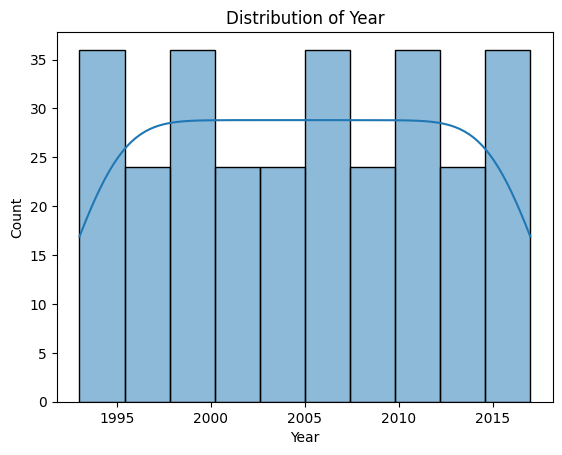

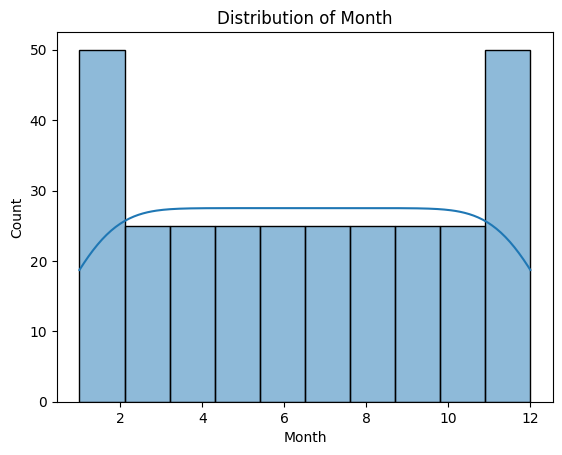

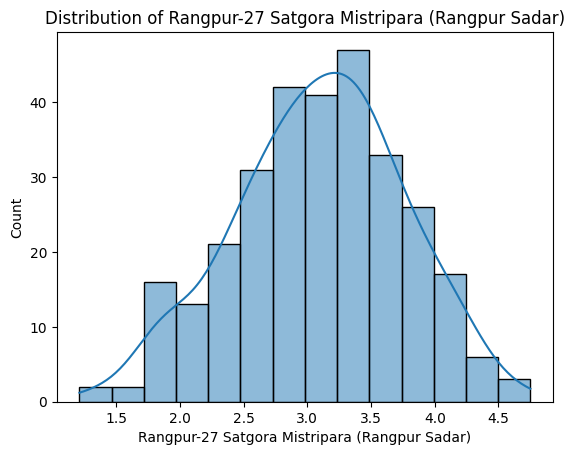

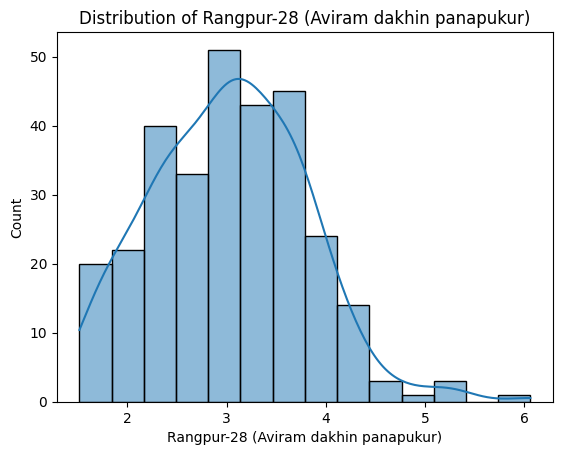

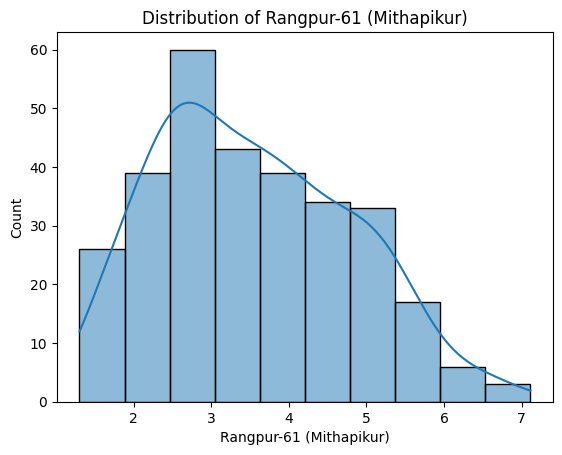

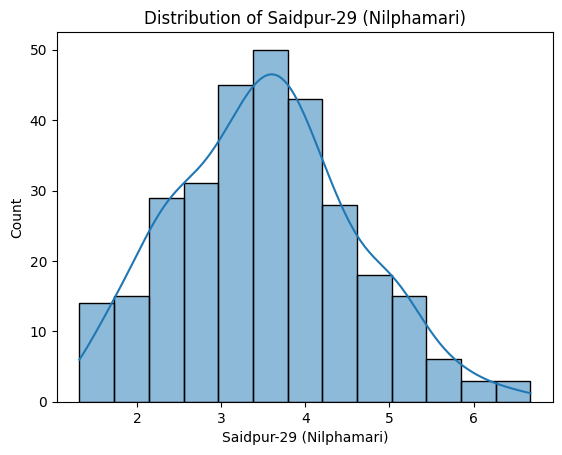

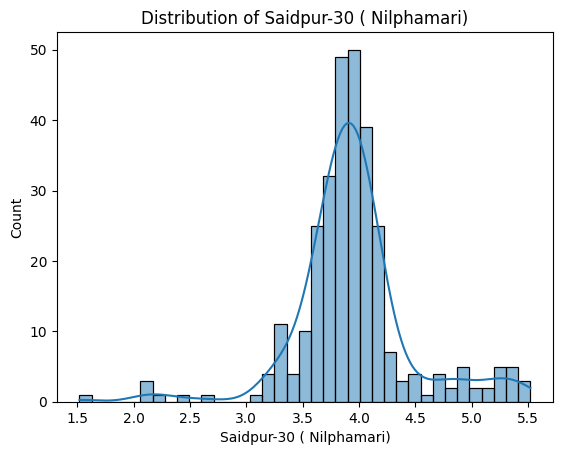

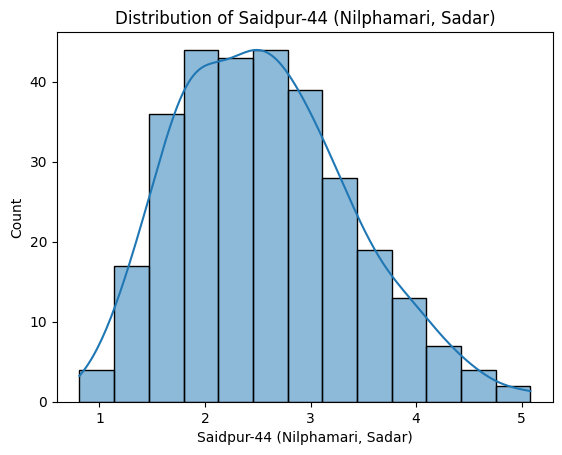

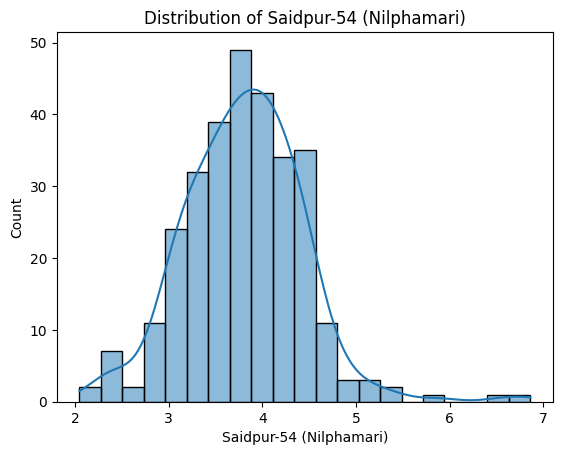

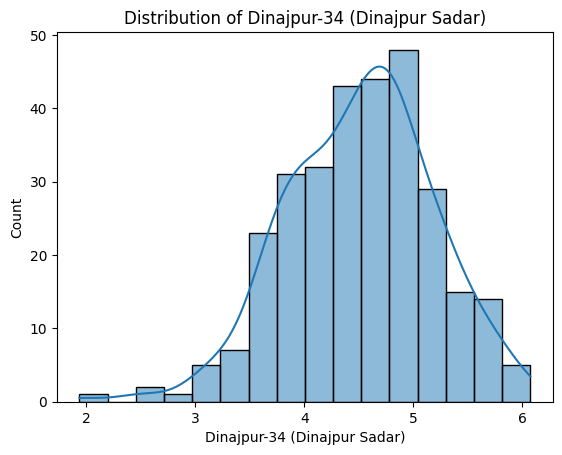

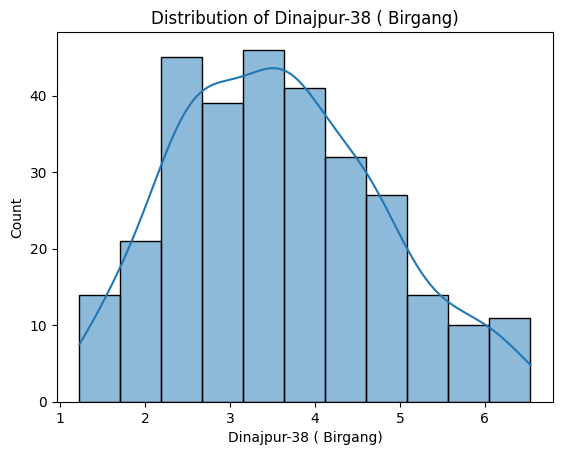

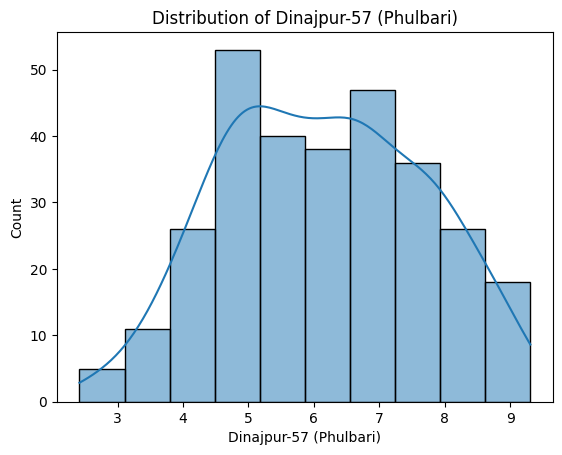

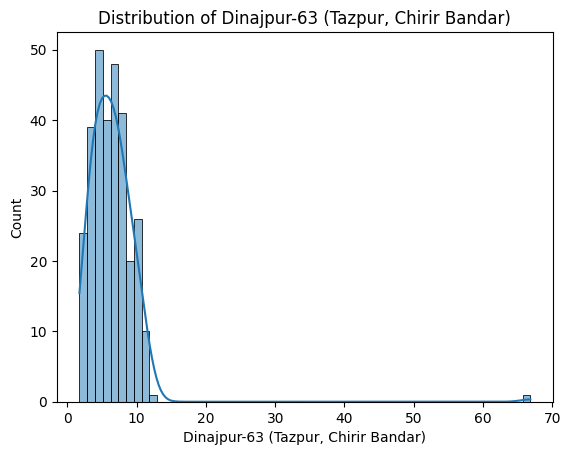

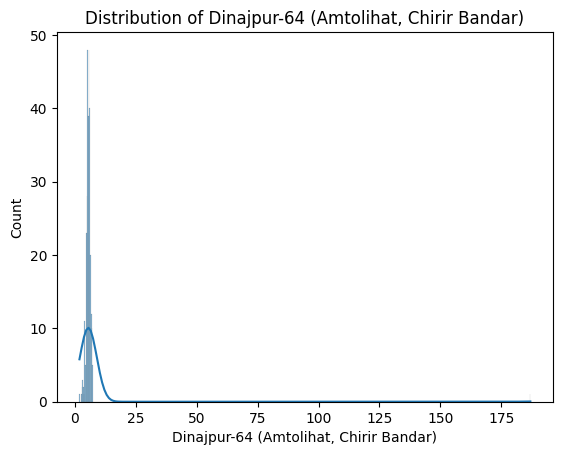

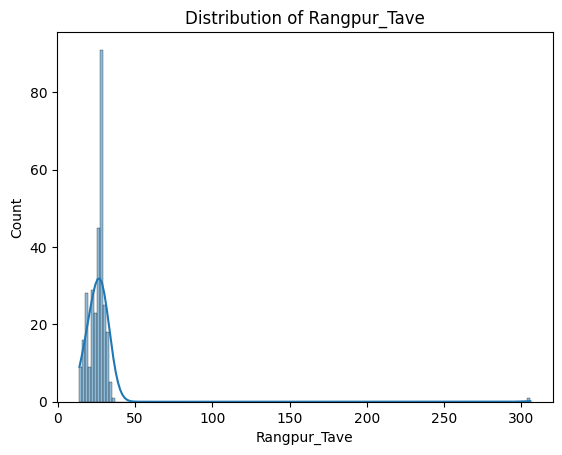

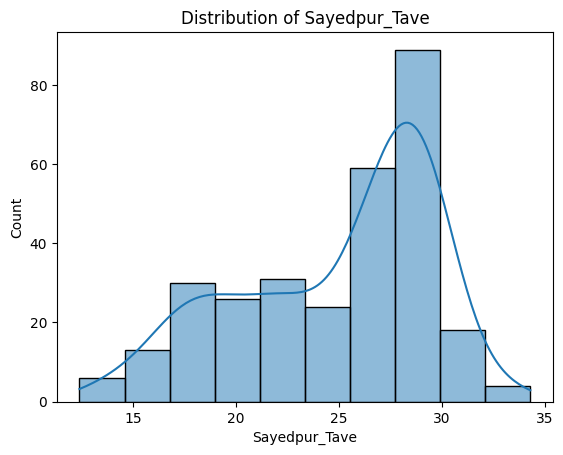

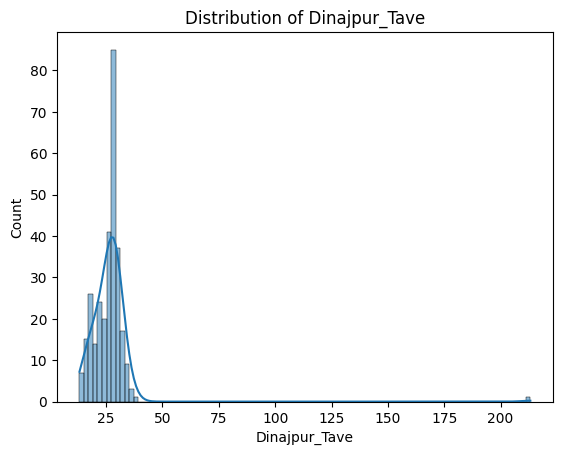

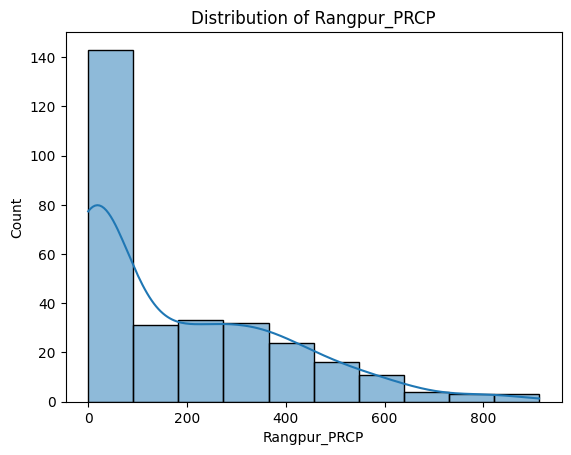

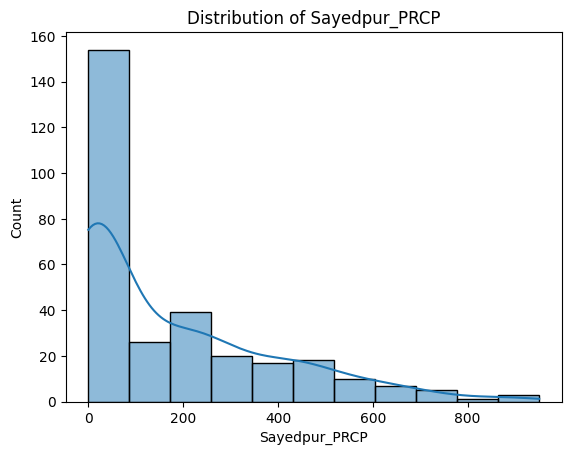

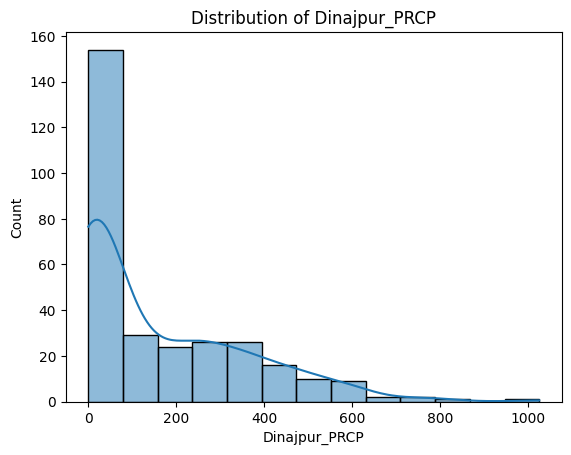

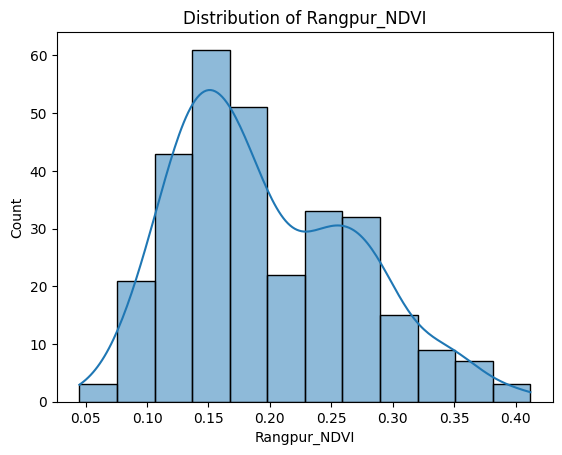

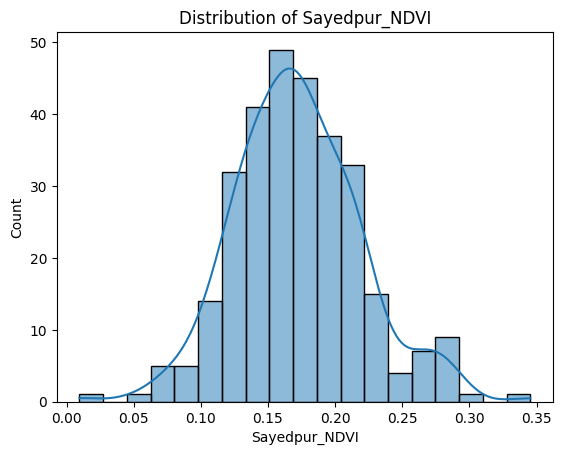

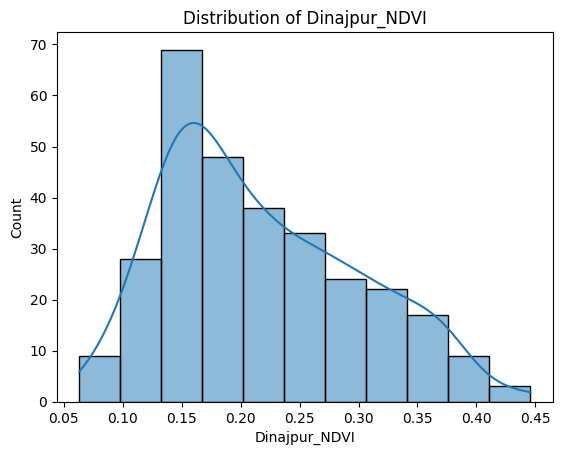

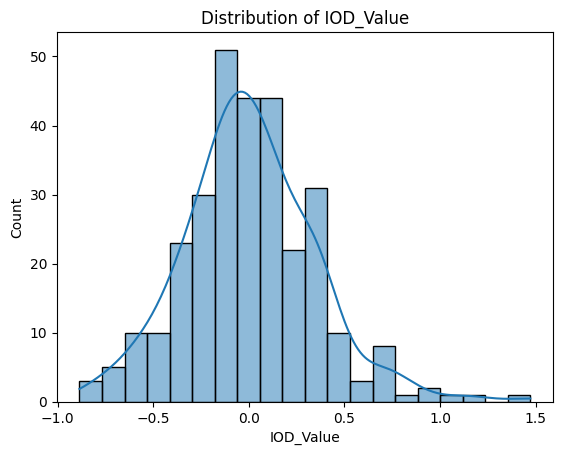

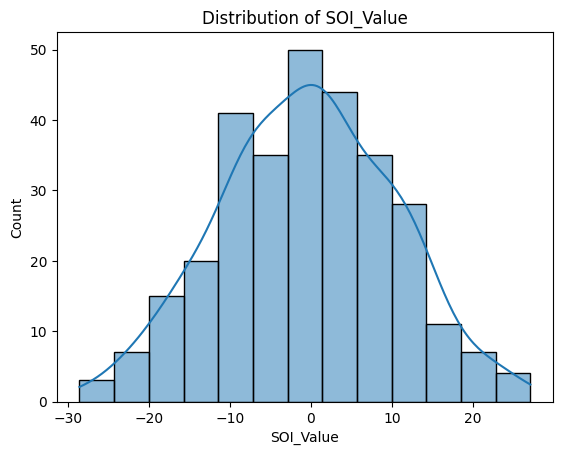

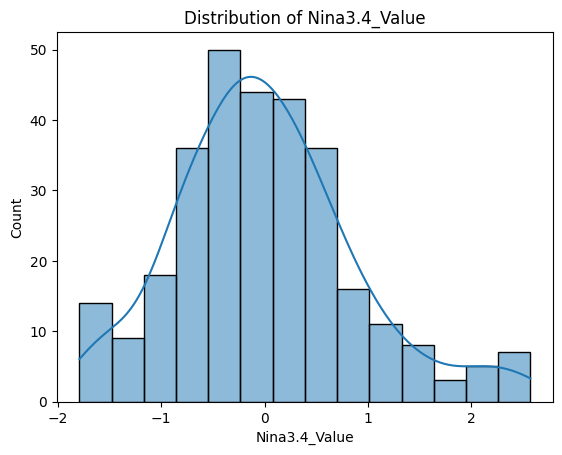

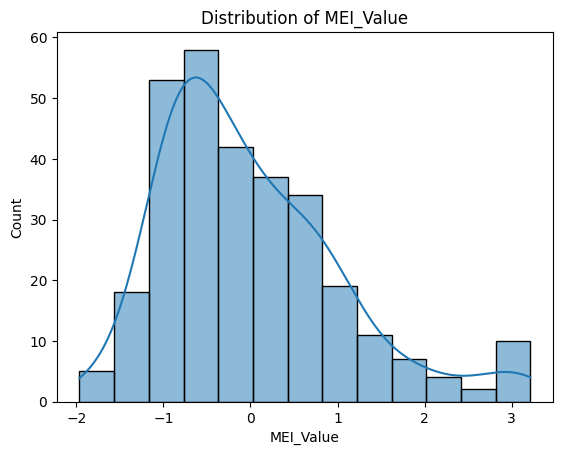

In [57]:
def plot_distribution(GWL_df):
    for column in GWL_df.columns:
        sns.histplot(GWL_df[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.show()

plot_distribution(GWL_df)

## The correlation matrix

In [58]:
correlation_matrix = GWL_df.corr()
correlation_matrix

Year         Month  \
Year                                           1.000000e+00  4.492787e-15   
Month                                          4.492787e-15  1.000000e+00   
Rangpur-27 Satgora Mistripara (Rangpur Sadar) -2.309931e-02 -4.502979e-01   
Rangpur-28 (Aviram dakhin panapukur)           1.375860e-01 -4.563475e-01   
Rangpur-61 (Mithapikur)                        3.766986e-01 -4.557813e-01   
Saidpur-29 (Nilphamari)                       -2.485332e-01 -3.645764e-01   
Saidpur-30 ( Nilphamari)                      -3.410470e-01 -1.791198e-01   
Saidpur-44 (Nilphamari, Sadar)                 3.105454e-01 -5.041870e-01   
Saidpur-54 (Nilphamari)                        9.550408e-02 -3.792069e-01   
Dinajpur-34 (Dinajpur Sadar)                   3.061834e-01 -3.552334e-01   
Dinajpur-38 ( Birgang)                         4.543036e-01 -3.942093e-01   
Dinajpur-57 (Phulbari)                         5.966686e-01 -3.426502e-01   
Dinajpur-63 (Tazpur, Chirir Bandar)            2.218393e-01 -1.937641e-01   
Dinajpur-64 (Amtolihat, Chirir Bandar)         3.579592e-02 -7.979403e-02   
Rangpur_Tave                                   1.694381e-01  2.830019e-02   
Sayedpur_Tave                                 -2.166969e-02  1.967976e-01   
Dinajpur_Tave                                  9.215874e-02  1.350877e-01   
Rangpur_PRCP                                  -1.534642e-02  1.398408e-01   
Sayedpur_PRCP                                 -5.402057e-02  1.538633e-01   
Dinajpur_PRCP                                 -5.832846e-02  1.688827e-01   
Rangpur_NDVI                                   1.098707e-02  1.682857e-01   
Sayedpur_NDVI                                  1.540909e-02  3.534326e-01   
Dinajpur_NDVI                                  2.973539e-02  2.807160e-02   
IOD_Value                                      9.514380e-02 -1.946965e-02   
SOI_Value                                      1.527199e-01  5.112460e-02   
Nina3.4_Value                                  1.079470e-02  3.310867e-02   
MEI_Value                                     -3.509079e-01  2.043037e-02   

                                               Rangpur-27 Satgora Mistripara (Rangpur Sadar)  \
Year                                                                               -0.023099   
Month                                                                              -0.450298   
Rangpur-27 Satgora Mistripara (Rangpur Sadar)                                       1.000000   
Rangpur-28 (Aviram dakhin panapukur)                                                0.683564   
Rangpur-61 (Mithapikur)                                                             0.633843   
Saidpur-29 (Nilphamari)                                                             0.566090   
Saidpur-30 ( Nilphamari)                                                            0.367860   
Saidpur-44 (Nilphamari, Sadar)                                                      0.740383   
Saidpur-54 (Nilphamari)                                                             0.712806   
Dinajpur-34 (Dinajpur Sadar)                                                        0.658433   
Dinajpur-38 ( Birgang)                                                              0.633373   
Dinajpur-57 (Phulbari)                                                              0.546796   
Dinajpur-63 (Tazpur, Chirir Bandar)                                                 0.363686   
Dinajpur-64 (Amtolihat, Chirir Bandar)                                              0.043885   
Rangpur_Tave                                                                       -0.058966   
Sayedpur_Tave                                                                      -0.208089   
Dinajpur_Tave                                                                      -0.094748   
Rangpur_PRCP                                                                       -0.428582   
Sayedpur_PRCP                                                             

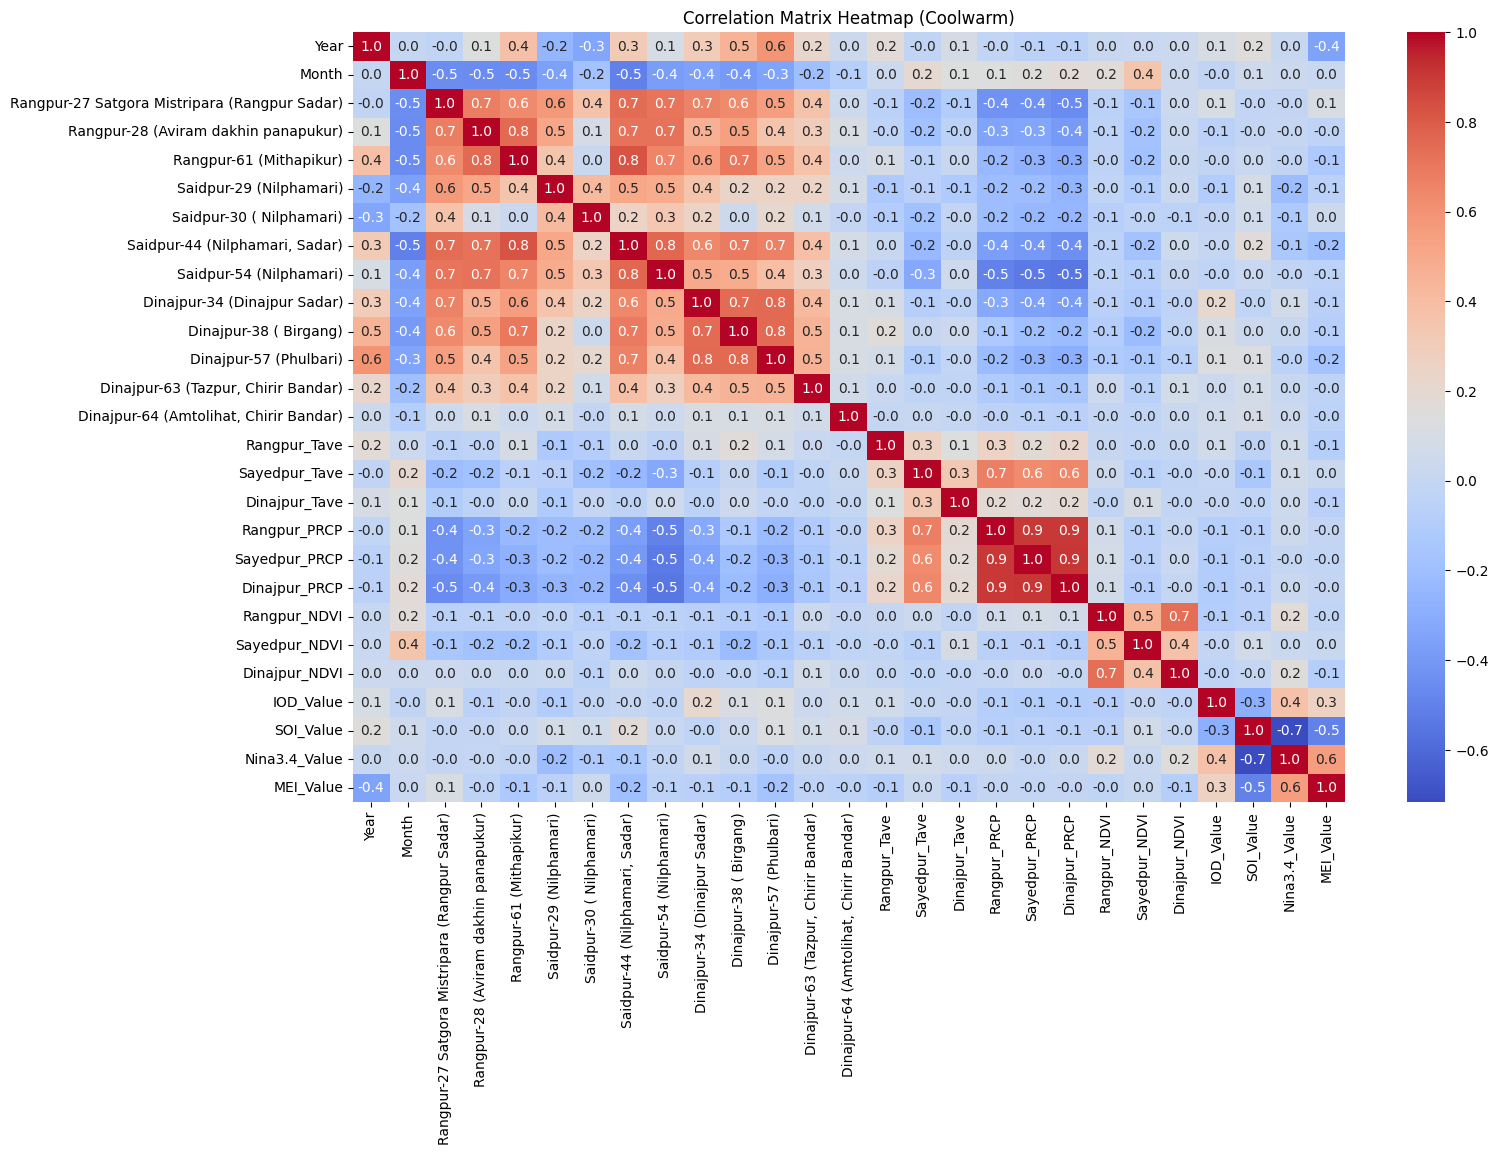

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = GWL_df.corr()

# Create a heatmap with the "coolwarm" color palette
plt.figure(figsize=(16, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Correlation Matrix Heatmap (Coolwarm)")
plt.show()

## Visualizing the time series

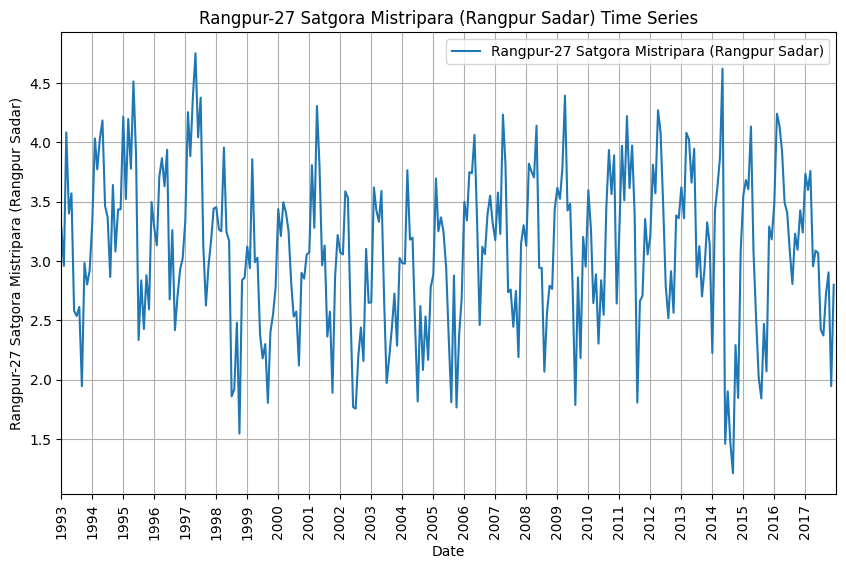

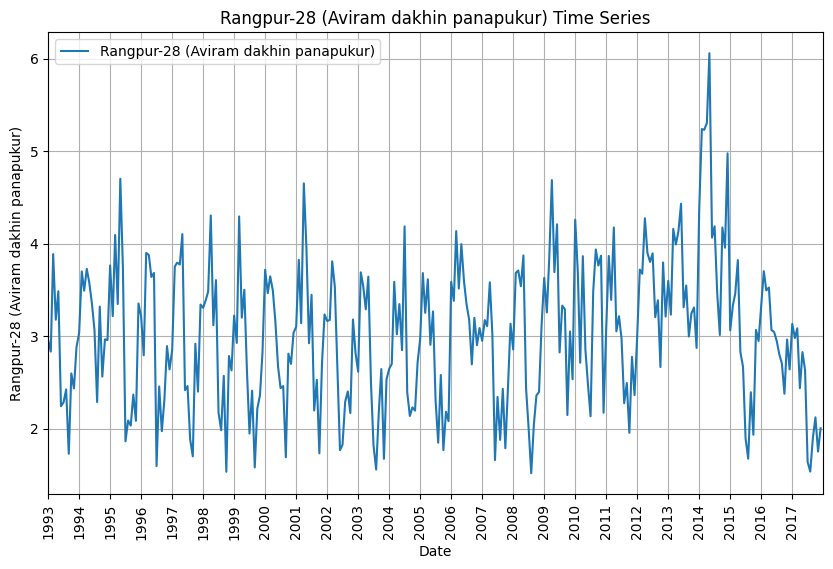

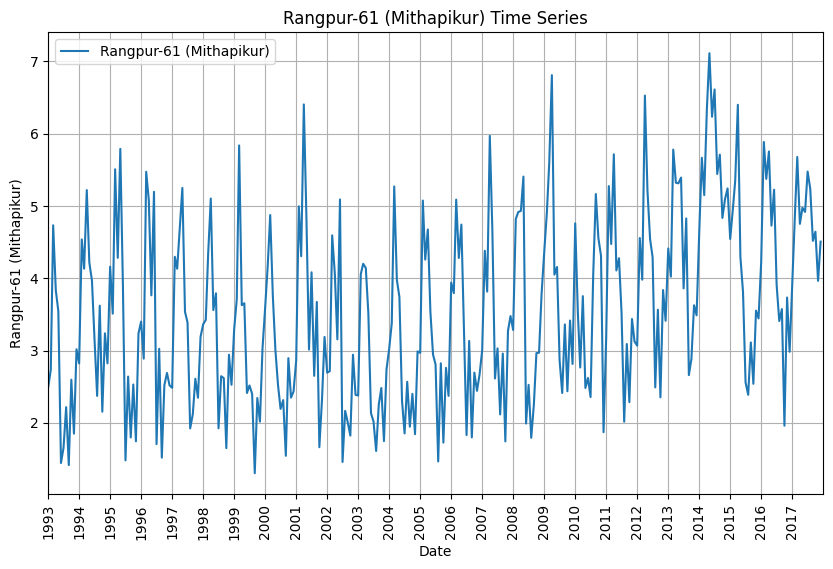

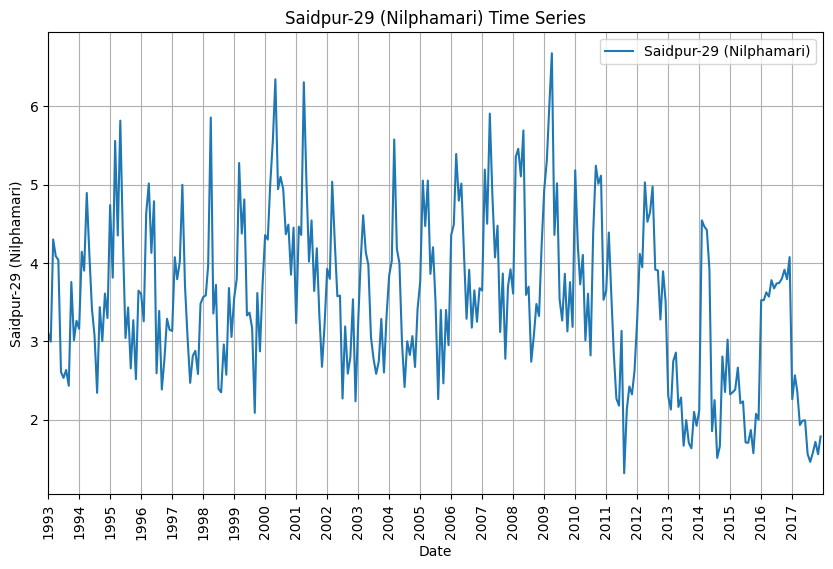

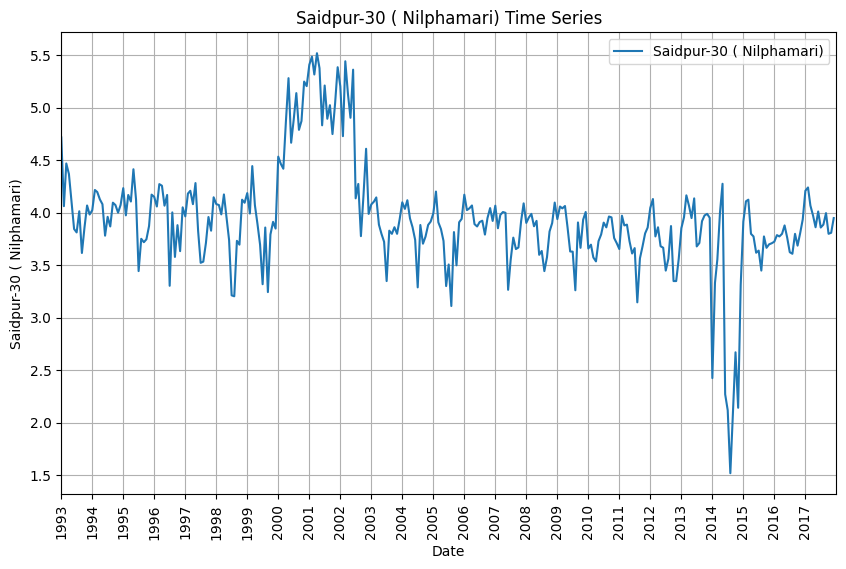

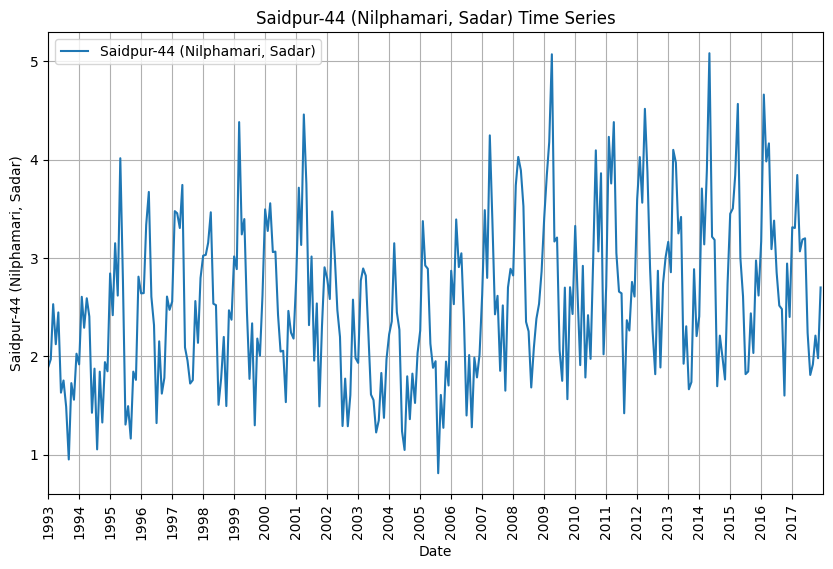

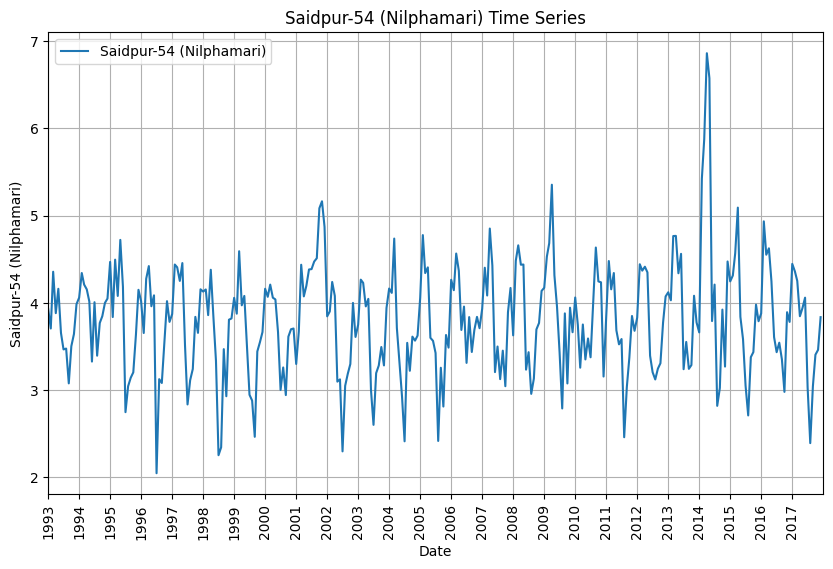

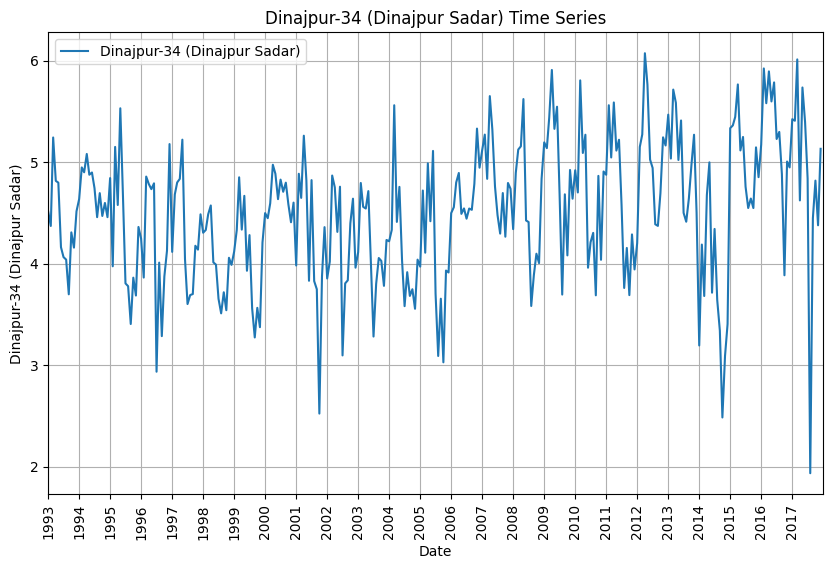

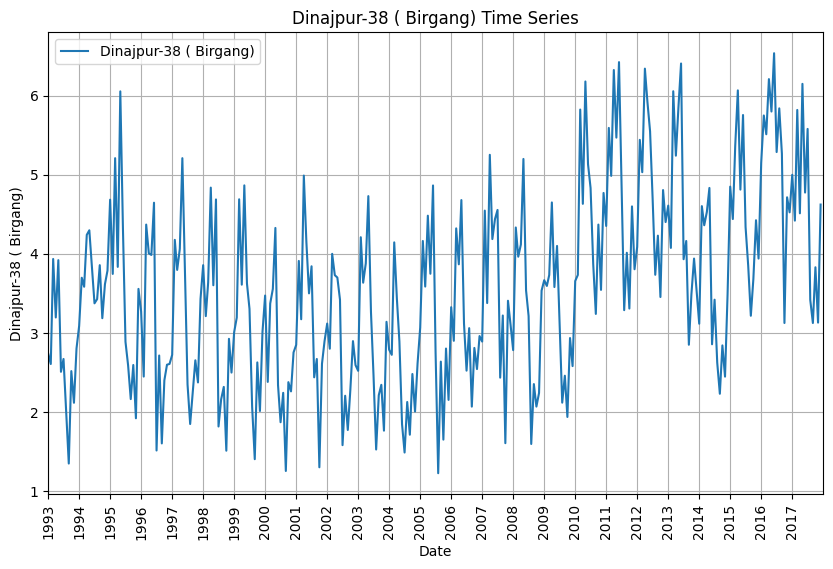

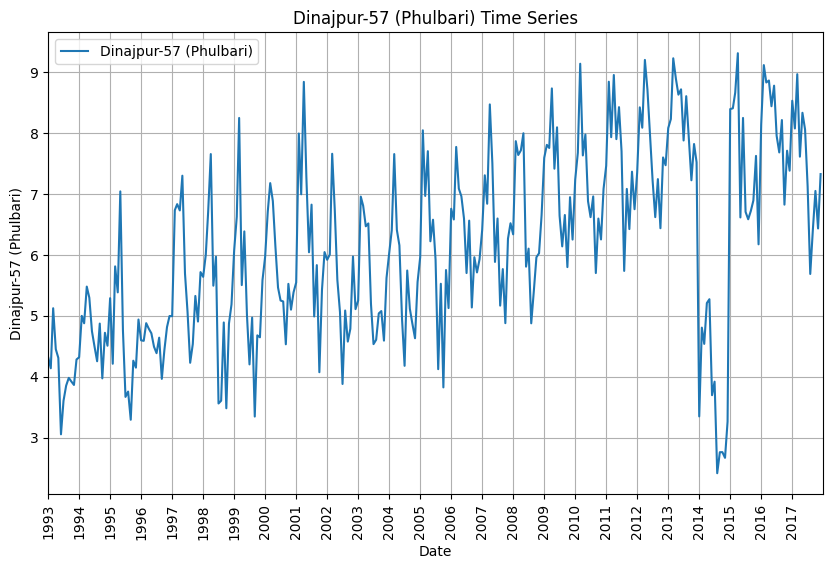

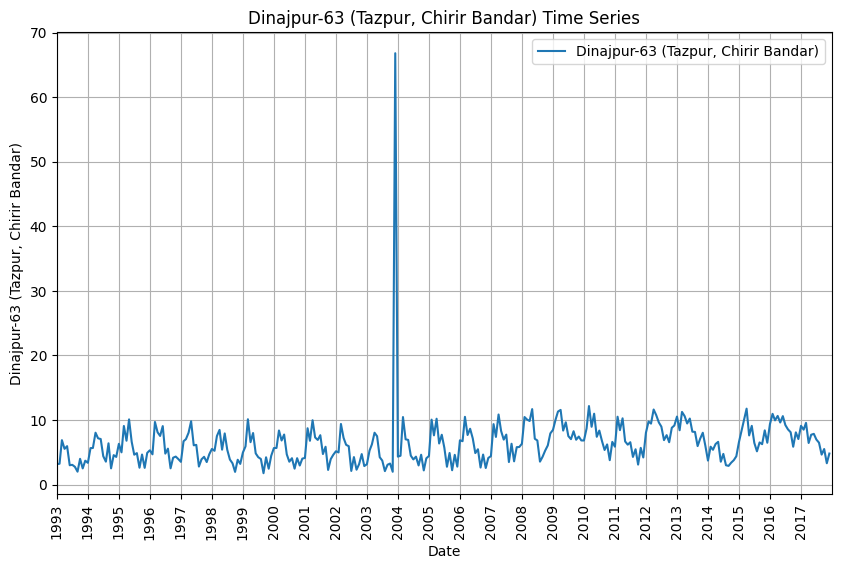

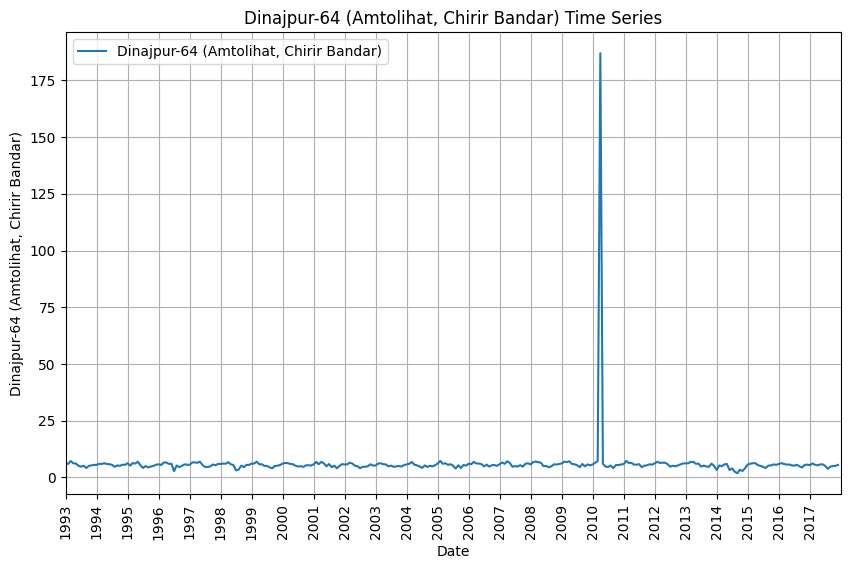

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_selected_columns(columns):
    # Load the data
    GWL_df = pd.read_excel('D:\Jupyter\Ground water level prediction(Towfiq Sir)\Final Dataset_GWL\Final_GWL_Three_location merged all data.xlsx')

    # Filter data for years 1993 to 2017
    GWL_df = GWL_df[(GWL_df['Year'] >= 1993) & (GWL_df['Year'] <= 2017)]

    # Create a time index using the Year and Month columns
    time_index = pd.to_datetime(GWL_df[['Year', 'Month']].assign(day=1))

    # Plot selected columns
    for column in columns:
        if column not in GWL_df.columns:
            print(f"Column '{column}' not found in the dataset.")
            continue

        column_data = GWL_df[column]

        plt.figure(figsize=(10, 6))
        plt.plot(time_index, column_data, label=f'{column}')
        plt.xlabel('Date')
        plt.ylabel(f'{column}')
        plt.title(f'{column} Time Series')
        plt.legend()
        plt.grid(True)

        # Set x-axis locator to display every year
        plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))

        # Format x-axis labels as years
        plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

        # Set x-axis limits
        plt.xlim(pd.Timestamp('1993-01-01'), pd.Timestamp('2017-12-31'))
                # Rotate x-axis tick labels
        plt.xticks(rotation=90)

        plt.show()

# Define a list of columns to visualize
selected_columns = ['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 
                     'Rangpur-28 (Aviram dakhin panapukur)',
                     'Rangpur-61 (Mithapikur)',
                     'Saidpur-29 (Nilphamari)',
                     'Saidpur-30 ( Nilphamari)',
                     'Saidpur-44 (Nilphamari, Sadar)',
                     'Saidpur-54 (Nilphamari)',
                     'Dinajpur-34 (Dinajpur Sadar)',
                     'Dinajpur-38 ( Birgang)',
                     'Dinajpur-57 (Phulbari)',
                     'Dinajpur-63 (Tazpur, Chirir Bandar)',
                     'Dinajpur-64 (Amtolihat, Chirir Bandar)']

# Call the function with selected columns
visualize_selected_columns(selected_columns)


#### For Dinajpur-63 and Dinajpur-64, potential outliers have been identified and should be removed from the dataset.

## Data Cleaning,Checking errors, Missing values

In [61]:
from DataFrame_Checker import DataFrameChecker

#  an instance of DataFrameChecker
checker = DataFrameChecker(GWL_df)

# Called the checking functions
checker.check_errors()

Errors in DataFrame:
No errors found in DataFrame


In [62]:
checker.check_missing_values()

No missing values found in DataFrame


## Outlier detection(Normality test)

In [64]:
import warnings
from scipy import stats


def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers

In [65]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  # Calculate the number of rows needed
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten()  # Flatten the axis array to iterate over it
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()
        
        # Remove any unused subplots
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')

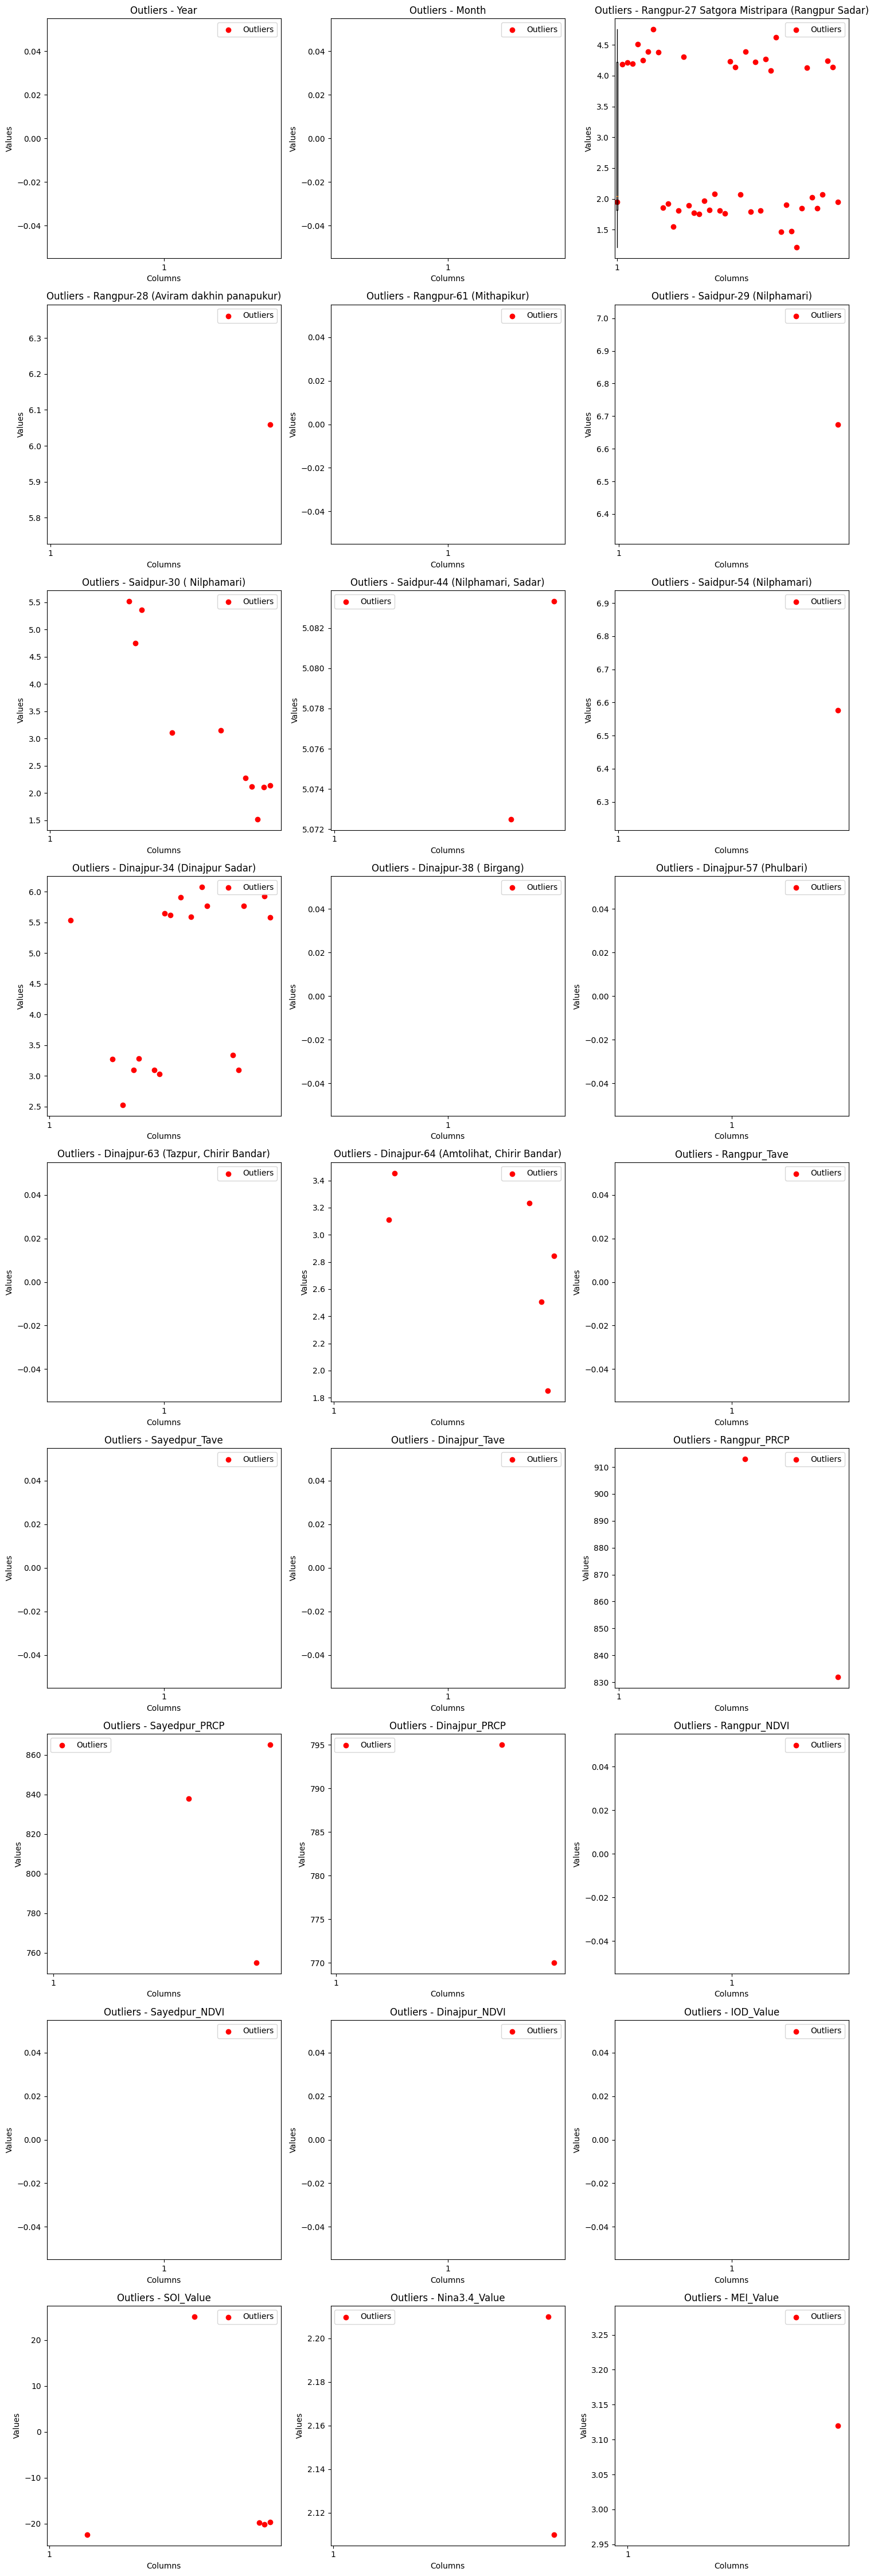

Number of total outliers: 220


In [66]:
# Detect outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = GWL_df.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = GWL_df[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualize outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# Print the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

# Outlier handling

In [67]:
# Calculate mean values for numeric columns
mean_values = GWL_df[numeric_columns].mean()

# Replace outliers with mean values
for column in numeric_columns:
    outliers = all_outliers[column]
    if not outliers.empty:
        GWL_df.loc[outliers.index, column] = mean_values[column]

# Check if outliers are replaced
print("Outliers replaced with mean values.")

Outliers replaced with mean values.


#### NB: In the following two areas, outliers have been detected. These values deviate significantly from the average; for instance, the mean value is approximately 6, but there are extreme values exceeding 66. To address this, I have replaced these outliers with their respective mean values.

In [68]:
GWL_df[['Dinajpur-63 (Tazpur, Chirir Bandar)', 'Dinajpur-64 (Amtolihat, Chirir Bandar)']].describe()

Dinajpur-63 (Tazpur, Chirir Bandar)  \
count                           300.000000   
mean                              6.466056   
std                               4.091090   
min                               1.980000   
25%                               4.622917   
50%                               6.435488   
75%                               7.646750   
max                              66.820000   

       Dinajpur-64 (Amtolihat, Chirir Bandar)  
count                              300.000000  
mean                                 6.239467  
std                                 10.490966  
min                                  2.755000  
25%                                  5.182500  
50%                                  5.735750  
75%                                  6.089568  
max                                186.982500

In [69]:
# Calculate the 99.5th percentile value for the specified columns
threshold = GWL_df[['Dinajpur-63 (Tazpur, Chirir Bandar)', 'Dinajpur-64 (Amtolihat, Chirir Bandar)']].quantile(0.995)

# Filter the DataFrame to get values greater than the threshold
outliers_dinajpur_63 = GWL_df['Dinajpur-63 (Tazpur, Chirir Bandar)'] > threshold['Dinajpur-63 (Tazpur, Chirir Bandar)']
outliers_dinajpur_64 = GWL_df['Dinajpur-64 (Amtolihat, Chirir Bandar)'] > threshold['Dinajpur-64 (Amtolihat, Chirir Bandar)']

# Get the rows where the values exceed the threshold
outliers_dinajpur_63_values = GWL_df.loc[outliers_dinajpur_63, 'Dinajpur-63 (Tazpur, Chirir Bandar)']
outliers_dinajpur_64_values = GWL_df.loc[outliers_dinajpur_64, 'Dinajpur-64 (Amtolihat, Chirir Bandar)']

In [70]:
outliers_dinajpur_63_values

131    66.8200
206    12.1575
Name: Dinajpur-63 (Tazpur, Chirir Bandar), dtype: float64

In [71]:
outliers_dinajpur_64_values

145      7.2775
207    186.9825
Name: Dinajpur-64 (Amtolihat, Chirir Bandar), dtype: float64

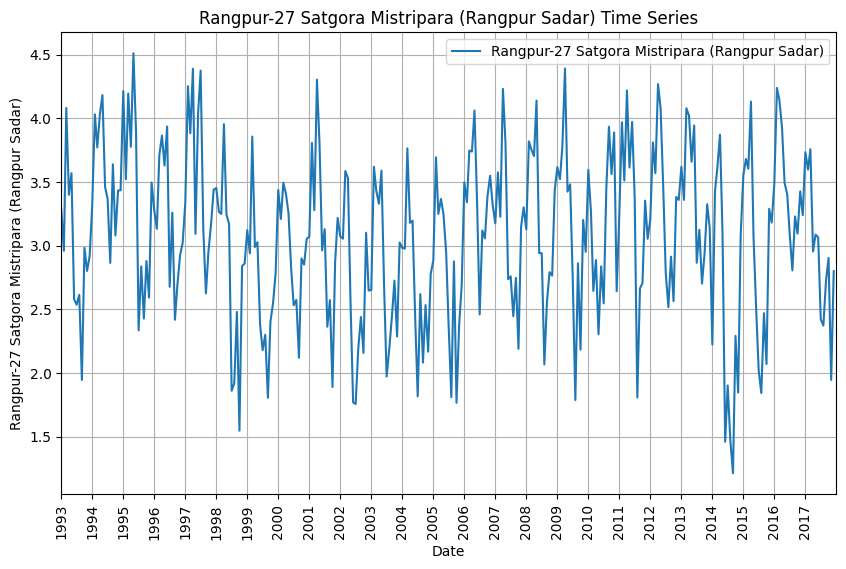

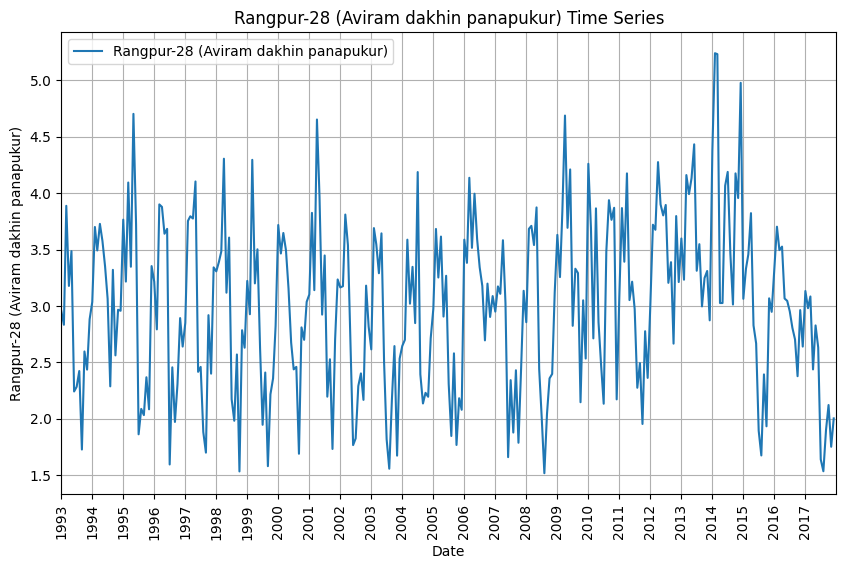

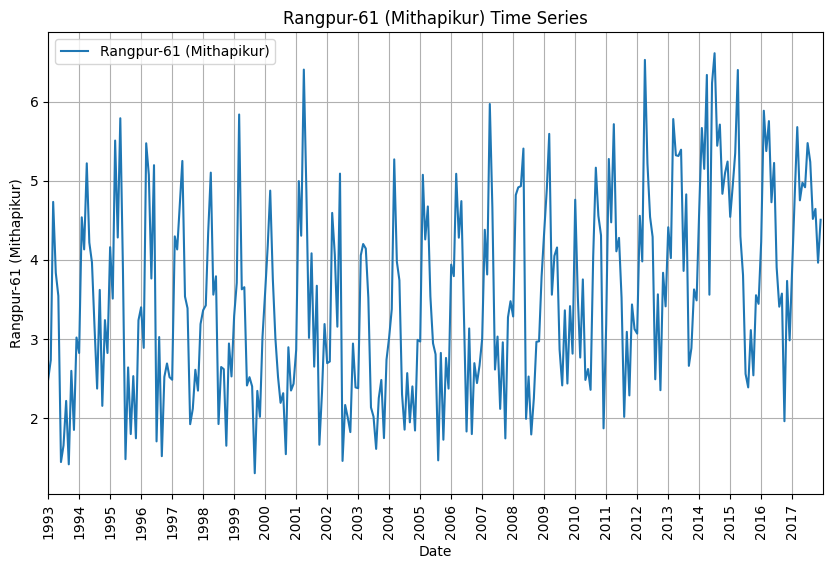

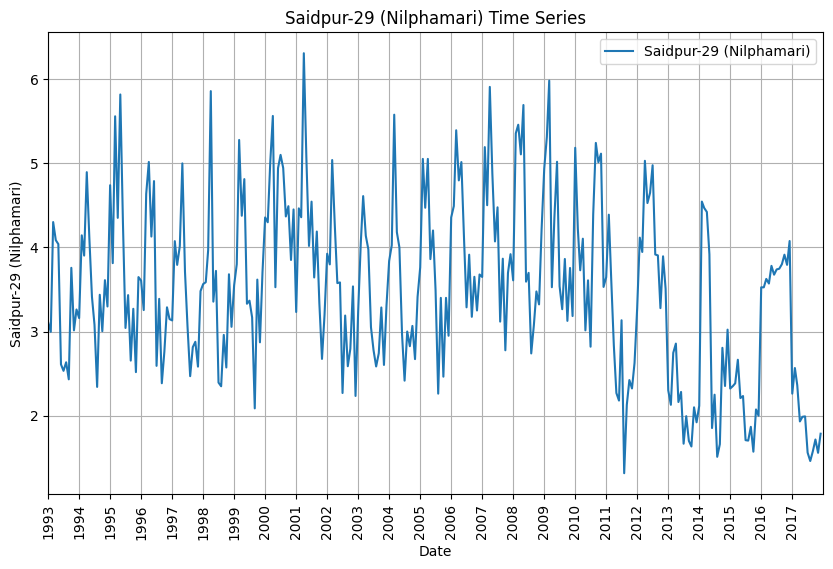

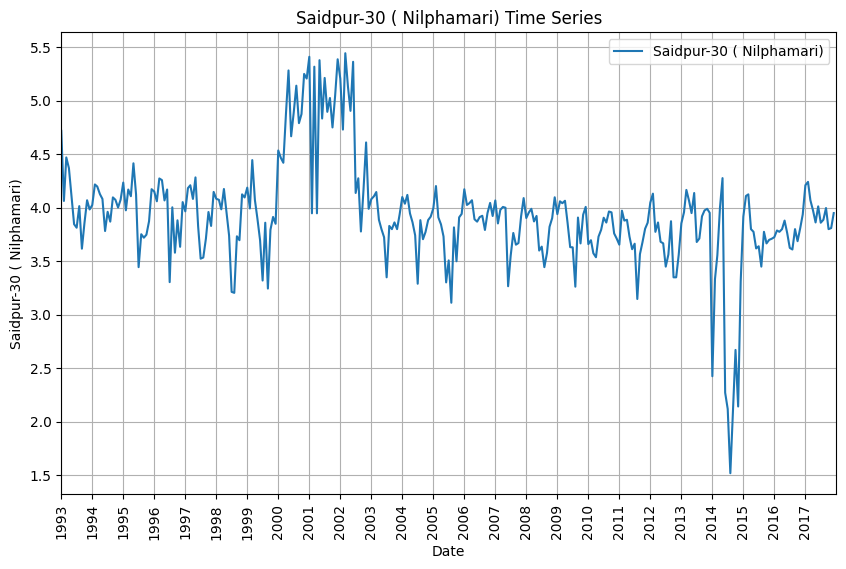

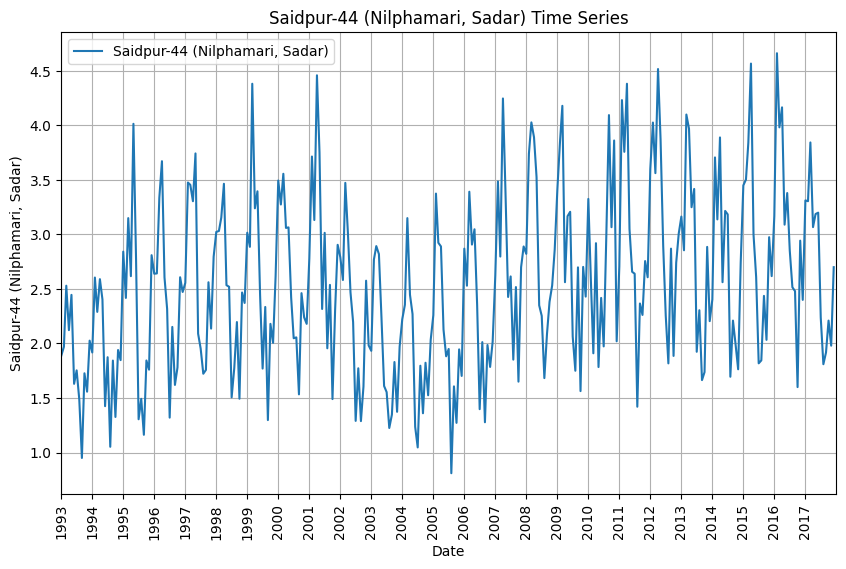

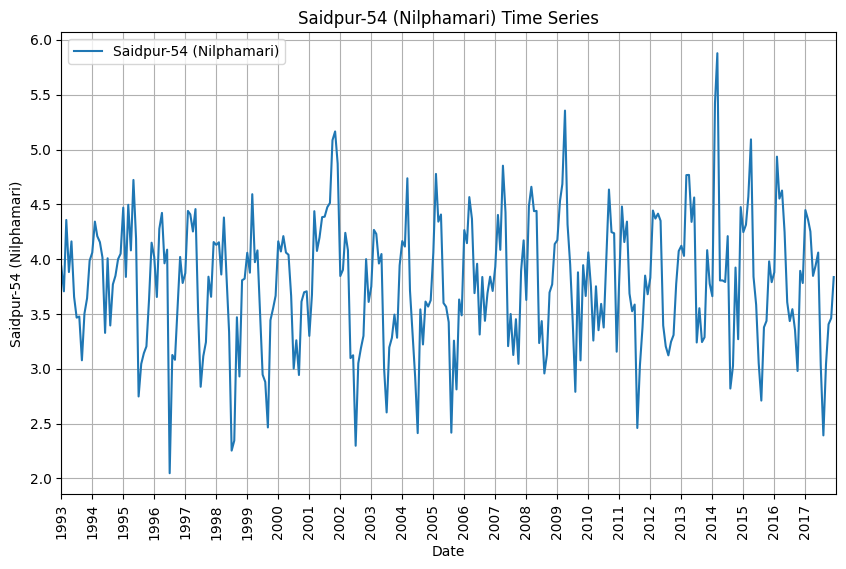

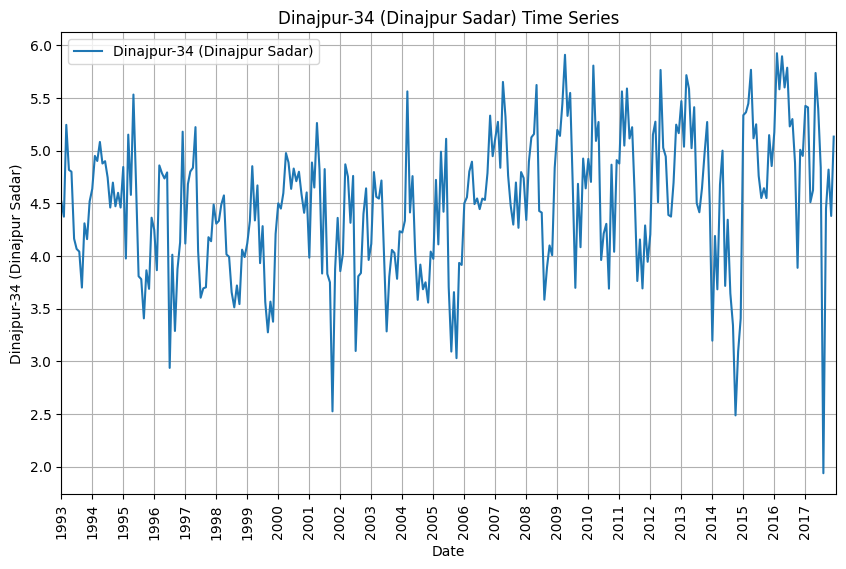

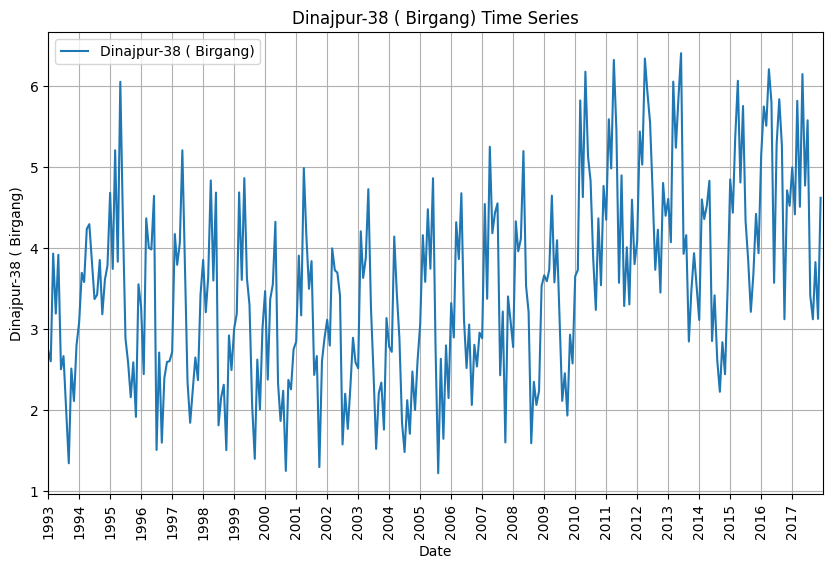

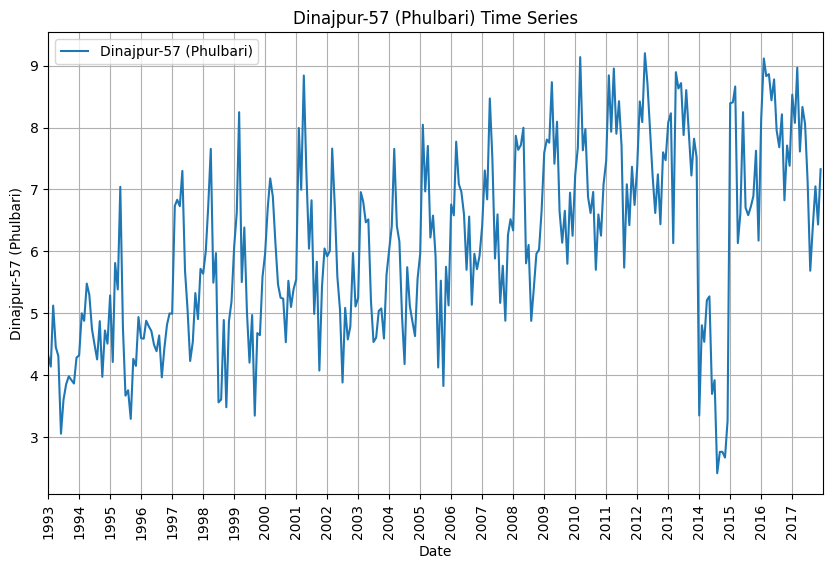

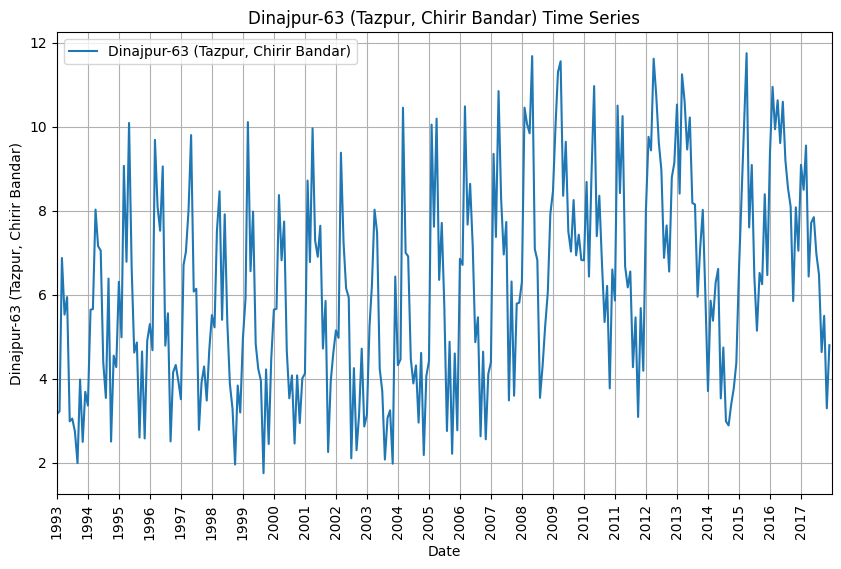

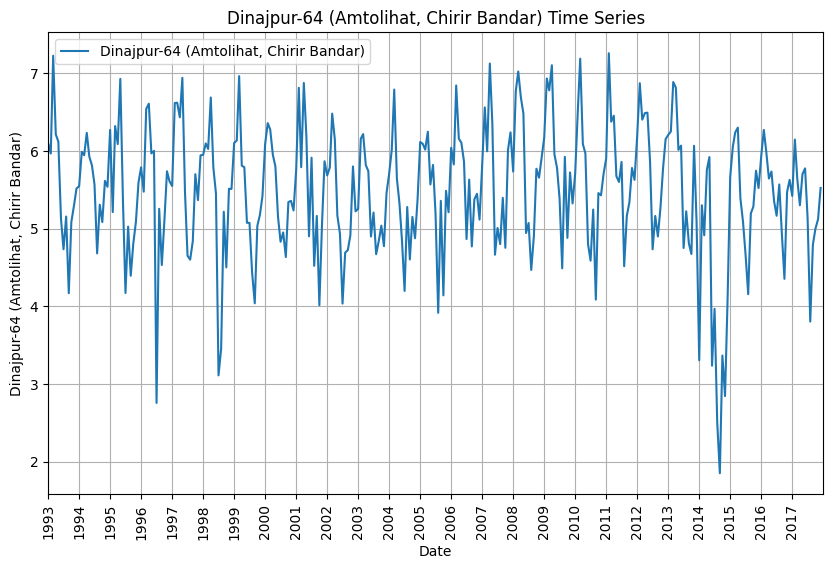

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_selected_columns(columns):
    # Load the data
    GWL_df = pd.read_excel('D:\Jupyter\Ground water level prediction(Towfiq Sir)\Final Dataset_GWL\Final_GWL_Three_location merged all data.xlsx')

    # Filter data for years 1993 to 2017
    GWL_df = GWL_df[(GWL_df['Year'] >= 1993) & (GWL_df['Year'] <= 2017)]

    # Calculate mean values for numeric columns
    numeric_columns = GWL_df.select_dtypes(include=['float64']).columns
    mean_values = GWL_df[numeric_columns].mean()

    # Replace outliers with mean values
    for column in numeric_columns:
        quantile_995 = GWL_df[column].quantile(0.995)
        GWL_df.loc[GWL_df[column] > quantile_995, column] = mean_values[column]

    # Create a time index using the Year and Month columns
    time_index = pd.to_datetime(GWL_df[['Year', 'Month']].assign(day=1))

    # Plot selected columns
    for column in columns:
        if column not in GWL_df.columns:
            print(f"Column '{column}' not found in the dataset.")
            continue

        column_data = GWL_df[column]

        plt.figure(figsize=(10, 6))
        plt.plot(time_index, column_data, label=f'{column}')
        plt.xlabel('Date')
        plt.ylabel(f'{column}')
        plt.title(f'{column} Time Series')
        plt.legend()
        plt.grid(True)

        # Set x-axis locator to display every year
        plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))

        # Format x-axis labels as years
        plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

        # Set x-axis limits
        plt.xlim(pd.Timestamp('1993-01-01'), pd.Timestamp('2017-12-31'))

        # Rotate x-axis tick labels
        plt.xticks(rotation=90)

        plt.show()

# Define a list of columns to visualize
selected_columns = ['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 
                     'Rangpur-28 (Aviram dakhin panapukur)',
                     'Rangpur-61 (Mithapikur)',
                     'Saidpur-29 (Nilphamari)',
                     'Saidpur-30 ( Nilphamari)',
                     'Saidpur-44 (Nilphamari, Sadar)',
                     'Saidpur-54 (Nilphamari)',
                     'Dinajpur-34 (Dinajpur Sadar)',
                     'Dinajpur-38 ( Birgang)',
                     'Dinajpur-57 (Phulbari)',
                     'Dinajpur-63 (Tazpur, Chirir Bandar)',
                     'Dinajpur-64 (Amtolihat, Chirir Bandar)']

# Call the function with selected columns
visualize_selected_columns(selected_columns)


## Transformation

In [73]:
from plotting_library import*

# Checking if transformation is needed
check_transformation_needed(GWL_df)

Transformation recommended for column: Year
Transformation recommended for column: Month
Transformation recommended for column: Rangpur-27 Satgora Mistripara (Rangpur Sadar)
Transformation recommended for column: Rangpur-28 (Aviram dakhin panapukur)
Transformation recommended for column: Rangpur-61 (Mithapikur)
Transformation recommended for column: Saidpur-29 (Nilphamari)
Transformation recommended for column: Saidpur-30 ( Nilphamari)
Transformation recommended for column: Saidpur-44 (Nilphamari, Sadar)
Transformation recommended for column: Saidpur-54 (Nilphamari)
Transformation recommended for column: Dinajpur-34 (Dinajpur Sadar)
Transformation recommended for column: Dinajpur-38 ( Birgang)
Transformation recommended for column: Dinajpur-57 (Phulbari)
Transformation recommended for column: Dinajpur-63 (Tazpur, Chirir Bandar)
Transformation recommended for column: Dinajpur-64 (Amtolihat, Chirir Bandar)
Transformation recommended for column: Rangpur_Tave
Transformation recommended for

D:\Jupyter\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\Jupyter\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


## I haven't performed any transformations yet. should I do it?

# Feature rankings

In [74]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

# Step 2: Separate features (X) and target variables (y)
X_train = GWL_df.loc[(GWL_df['Year'] >= 1993) & (GWL_df['Year'] <= 2012)].drop(columns=['Year', 'Month', 'Rangpur_Tave', 'Sayedpur_Tave', 'Dinajpur_Tave', 'Rangpur_PRCP', 'Sayedpur_PRCP', 'Dinajpur_PRCP', 'Rangpur_NDVI', 'Sayedpur_NDVI', 'Dinajpur_NDVI', 'IOD_Value', 'SOI_Value', 'Nina3.4_Value', 'MEI_Value'])
y_train = X_train[['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 'Rangpur-28 (Aviram dakhin panapukur)', 'Rangpur-61 (Mithapikur)', 'Saidpur-29 (Nilphamari)', 'Saidpur-30 ( Nilphamari)', 'Saidpur-44 (Nilphamari, Sadar)', 'Saidpur-54 (Nilphamari)', 'Dinajpur-34 (Dinajpur Sadar)', 'Dinajpur-38 ( Birgang)', 'Dinajpur-57 (Phulbari)', 'Dinajpur-63 (Tazpur, Chirir Bandar)', 'Dinajpur-64 (Amtolihat, Chirir Bandar)']]

X_test = GWL_df.loc[(GWL_df['Year'] >= 2013) & (GWL_df['Year'] <= 2017)].drop(columns=['Year', 'Month', 'Rangpur_Tave', 'Sayedpur_Tave', 'Dinajpur_Tave', 'Rangpur_PRCP', 'Sayedpur_PRCP', 'Dinajpur_PRCP', 'Rangpur_NDVI', 'Sayedpur_NDVI', 'Dinajpur_NDVI', 'IOD_Value', 'SOI_Value', 'Nina3.4_Value', 'MEI_Value'])
y_test = X_test[['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 'Rangpur-28 (Aviram dakhin panapukur)', 'Rangpur-61 (Mithapikur)', 'Saidpur-29 (Nilphamari)', 'Saidpur-30 ( Nilphamari)', 'Saidpur-44 (Nilphamari, Sadar)', 'Saidpur-54 (Nilphamari)', 'Dinajpur-34 (Dinajpur Sadar)', 'Dinajpur-38 ( Birgang)', 'Dinajpur-57 (Phulbari)', 'Dinajpur-63 (Tazpur, Chirir Bandar)', 'Dinajpur-64 (Amtolihat, Chirir Bandar)']]


# Perform PCA to rank the features based on explained variance ratio
pca = PCA()
X_pca = pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({'Feature': X_train.columns, 'Explained Variance Ratio': explained_variance_ratio})

# Rank features using Random Forest
random_state = 42  # Set any integer value as seed
rf = RandomForestRegressor(random_state=random_state)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the feature importance dataframe in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# the feature rankings
print("Feature ranking using PCA - Explained Variance Ratio:")
print(explained_variance_df)
print("\nFeature ranking using Random Forest - Feature Importance:")
print(feature_importance_df)

Feature ranking using PCA - Explained Variance Ratio:
                                          Feature  Explained Variance Ratio
0   Rangpur-27 Satgora Mistripara (Rangpur Sadar)                  0.846261
1            Rangpur-28 (Aviram dakhin panapukur)                  0.125292
2                         Rangpur-61 (Mithapikur)                  0.017615
3                         Saidpur-29 (Nilphamari)                  0.004133
4                        Saidpur-30 ( Nilphamari)                  0.002352
5                  Saidpur-44 (Nilphamari, Sadar)                  0.001317
6                         Saidpur-54 (Nilphamari)                  0.000913
7                    Dinajpur-34 (Dinajpur Sadar)                  0.000723
8                          Dinajpur-38 ( Birgang)                  0.000465
9                          Dinajpur-57 (Phulbari)                  0.000387
10            Dinajpur-63 (Tazpur, Chirir Bandar)                  0.000318
11         Dinajpur-64 (Amtolihat,

# Model building and prediction

In [75]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Step 2: Separate features (X) and target variables (y)
X_train = GWL_df.loc[(GWL_df['Year'] >= 1993) & (GWL_df['Year'] <= 2012)].drop(columns=['Year', 'Month', 'Rangpur_Tave', 'Sayedpur_Tave', 'Dinajpur_Tave', 'Rangpur_PRCP', 'Sayedpur_PRCP', 'Dinajpur_PRCP', 'Rangpur_NDVI', 'Sayedpur_NDVI', 'Dinajpur_NDVI', 'IOD_Value', 'SOI_Value', 'Nina3.4_Value', 'MEI_Value'])
y_train = X_train[['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 'Rangpur-28 (Aviram dakhin panapukur)', 'Rangpur-61 (Mithapikur)', 'Saidpur-29 (Nilphamari)', 'Saidpur-30 ( Nilphamari)', 'Saidpur-44 (Nilphamari, Sadar)', 'Saidpur-54 (Nilphamari)', 'Dinajpur-34 (Dinajpur Sadar)', 'Dinajpur-38 ( Birgang)', 'Dinajpur-57 (Phulbari)', 'Dinajpur-63 (Tazpur, Chirir Bandar)', 'Dinajpur-64 (Amtolihat, Chirir Bandar)']]

X_test = GWL_df.loc[(GWL_df['Year'] >= 2013) & (GWL_df['Year'] <= 2017)].drop(columns=['Year', 'Month', 'Rangpur_Tave', 'Sayedpur_Tave', 'Dinajpur_Tave', 'Rangpur_PRCP', 'Sayedpur_PRCP', 'Dinajpur_PRCP', 'Rangpur_NDVI', 'Sayedpur_NDVI', 'Dinajpur_NDVI', 'IOD_Value', 'SOI_Value', 'Nina3.4_Value', 'MEI_Value'])
y_test = X_test[['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 'Rangpur-28 (Aviram dakhin panapukur)', 'Rangpur-61 (Mithapikur)', 'Saidpur-29 (Nilphamari)', 'Saidpur-30 ( Nilphamari)', 'Saidpur-44 (Nilphamari, Sadar)', 'Saidpur-54 (Nilphamari)', 'Dinajpur-34 (Dinajpur Sadar)', 'Dinajpur-38 ( Birgang)', 'Dinajpur-57 (Phulbari)', 'Dinajpur-63 (Tazpur, Chirir Bandar)', 'Dinajpur-64 (Amtolihat, Chirir Bandar)']]

# Step 3: Train your model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 4: Predict using the trained model
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5561264215544854


In [76]:
# Prediction
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


# Assuming GWL_df contains your dataset

# Step 2: Separate features (X) and target variables (y)
# Step 2: Separate features (X) and target variables (y)
X_train = GWL_df.loc[(GWL_df['Year'] >= 1993) & (GWL_df['Year'] <= 2012)].drop(columns=['Year', 'Month', 'Rangpur_Tave', 'Sayedpur_Tave', 'Dinajpur_Tave', 'Rangpur_PRCP', 'Sayedpur_PRCP', 'Dinajpur_PRCP', 'Rangpur_NDVI', 'Sayedpur_NDVI', 'Dinajpur_NDVI', 'IOD_Value', 'SOI_Value', 'Nina3.4_Value', 'MEI_Value'])
y_train = X_train[['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 'Rangpur-28 (Aviram dakhin panapukur)', 'Rangpur-61 (Mithapikur)', 'Saidpur-29 (Nilphamari)', 'Saidpur-30 ( Nilphamari)', 'Saidpur-44 (Nilphamari, Sadar)', 'Saidpur-54 (Nilphamari)', 'Dinajpur-34 (Dinajpur Sadar)', 'Dinajpur-38 ( Birgang)', 'Dinajpur-57 (Phulbari)', 'Dinajpur-63 (Tazpur, Chirir Bandar)', 'Dinajpur-64 (Amtolihat, Chirir Bandar)']]

X_test = GWL_df.loc[(GWL_df['Year'] >= 2013) & (GWL_df['Year'] <= 2017)].drop(columns=['Year', 'Month', 'Rangpur_Tave', 'Sayedpur_Tave', 'Dinajpur_Tave', 'Rangpur_PRCP', 'Sayedpur_PRCP', 'Dinajpur_PRCP', 'Rangpur_NDVI', 'Sayedpur_NDVI', 'Dinajpur_NDVI', 'IOD_Value', 'SOI_Value', 'Nina3.4_Value', 'MEI_Value'])
y_test = X_test[['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 'Rangpur-28 (Aviram dakhin panapukur)', 'Rangpur-61 (Mithapikur)', 'Saidpur-29 (Nilphamari)', 'Saidpur-30 ( Nilphamari)', 'Saidpur-44 (Nilphamari, Sadar)', 'Saidpur-54 (Nilphamari)', 'Dinajpur-34 (Dinajpur Sadar)', 'Dinajpur-38 ( Birgang)', 'Dinajpur-57 (Phulbari)', 'Dinajpur-63 (Tazpur, Chirir Bandar)', 'Dinajpur-64 (Amtolihat, Chirir Bandar)']]

# Step 3: Train your model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Step 4: Predict using the trained model
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5631731200807


In [77]:
import pandas as pd

# Assuming y_test and y_pred are the actual and predicted values, respectively
actual_vs_predicted = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})

# Display the DataFrame
print(actual_vs_predicted)


       Actual  Predicted
0    3.620000   3.516543
1    3.598000   3.614393
2    4.412000   4.357767
3    2.302000   4.535630
4    3.854000   3.893730
..        ...        ...
559  5.133333   4.169293
560  4.623333   3.239812
561  7.326667   6.172190
562  4.800000   4.441820
563  5.523333   5.588125

[564 rows x 2 columns]


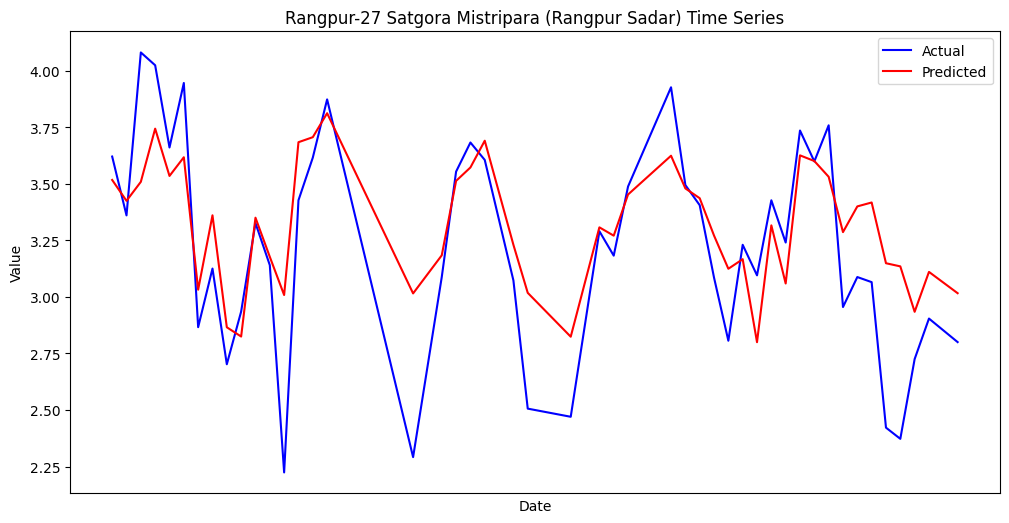

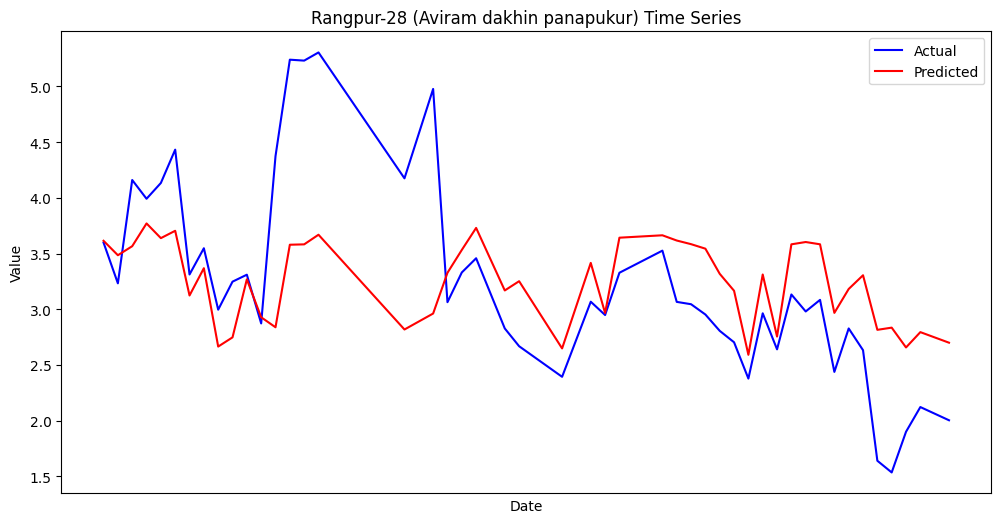

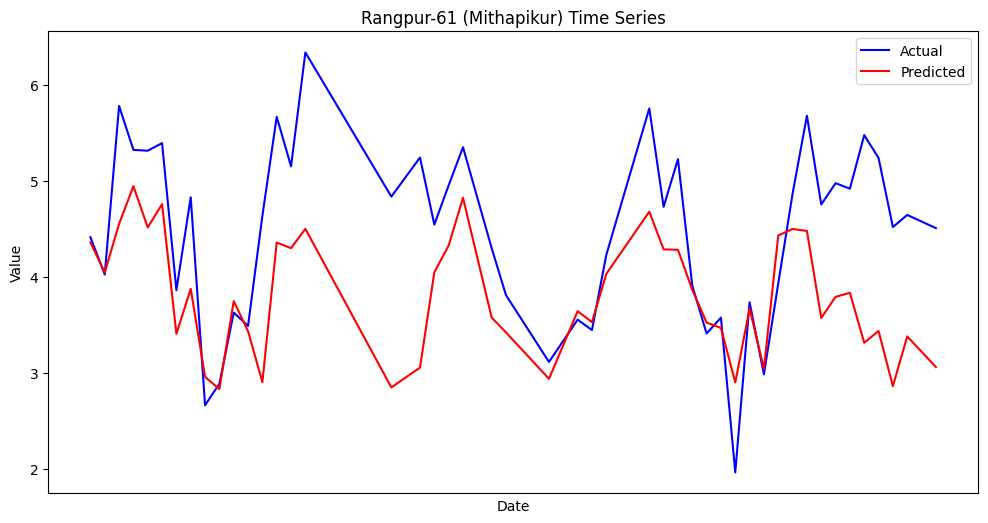

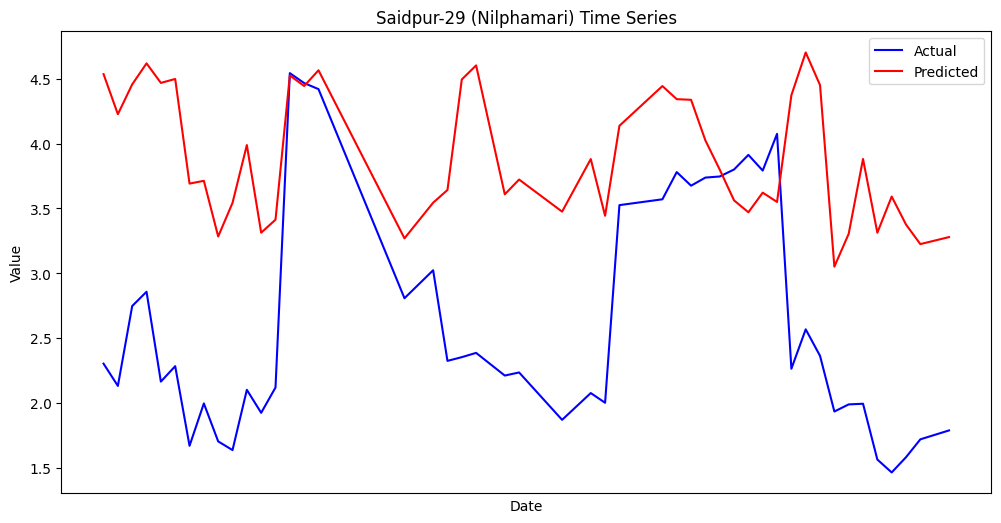

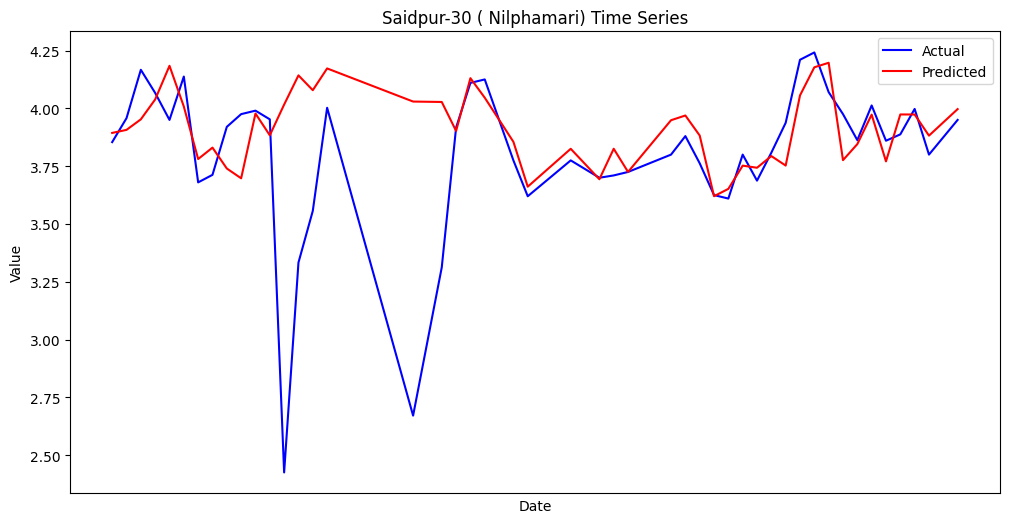

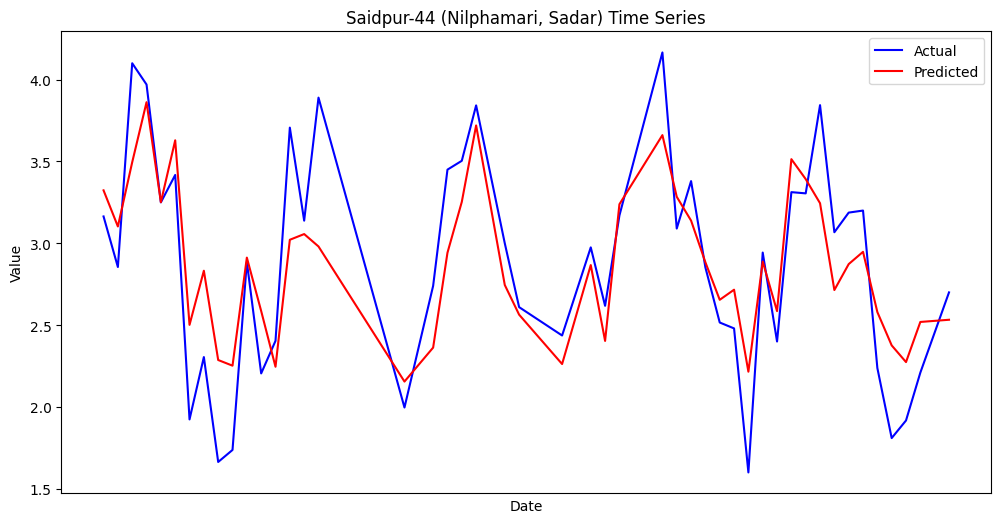

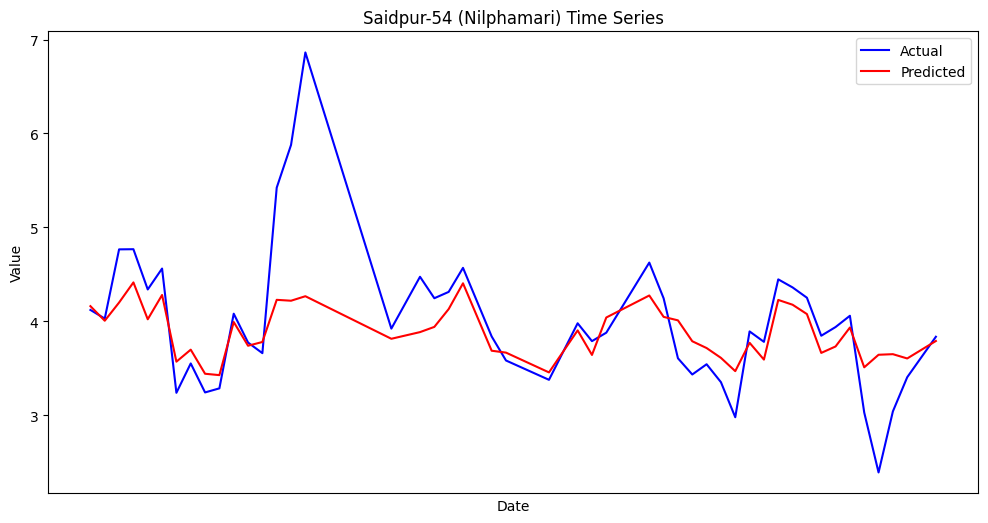

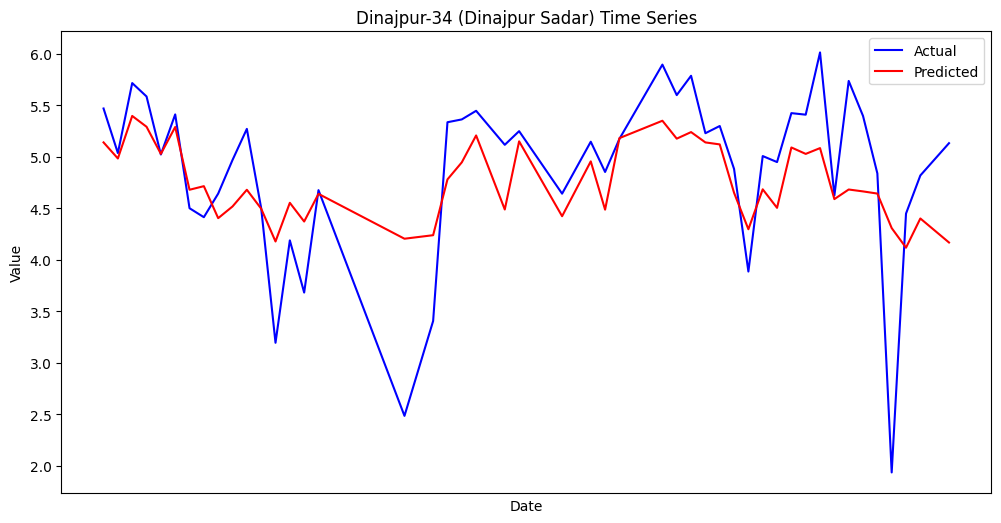

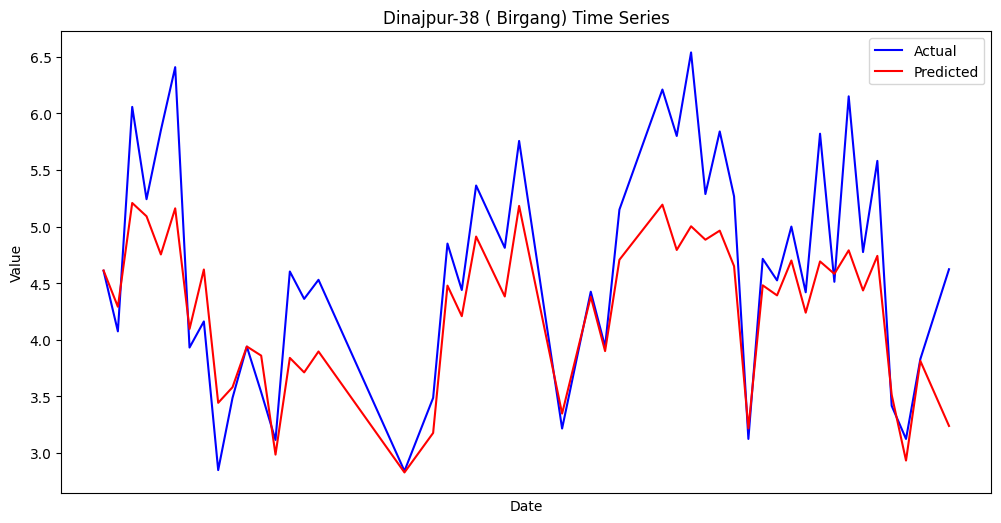

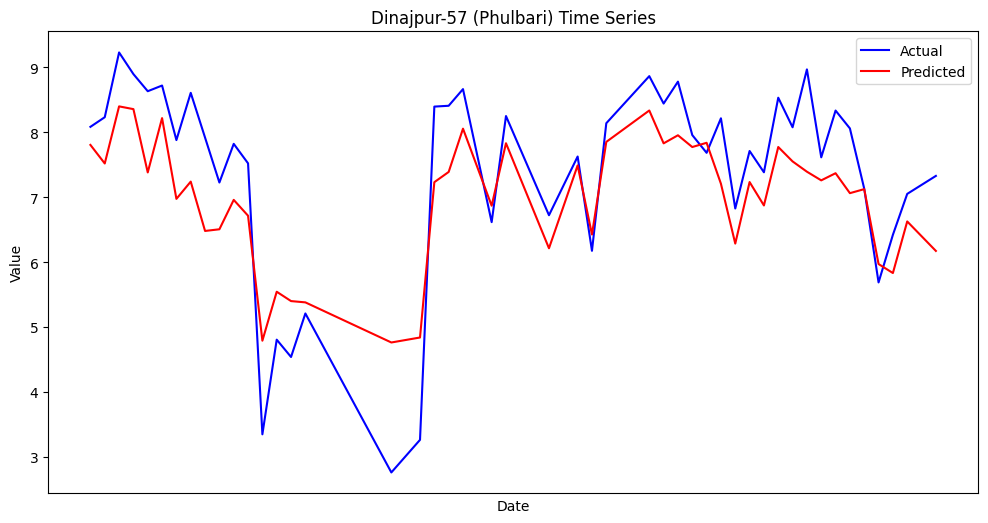

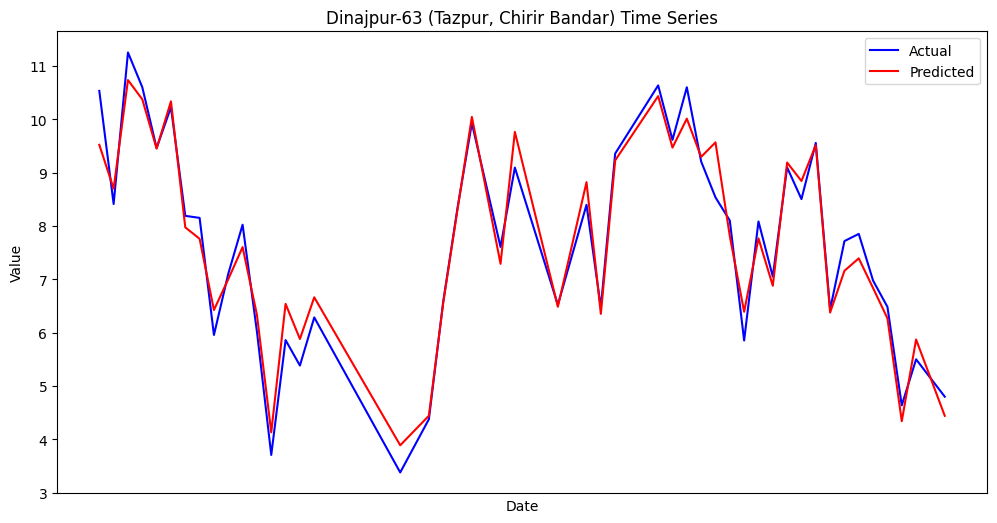

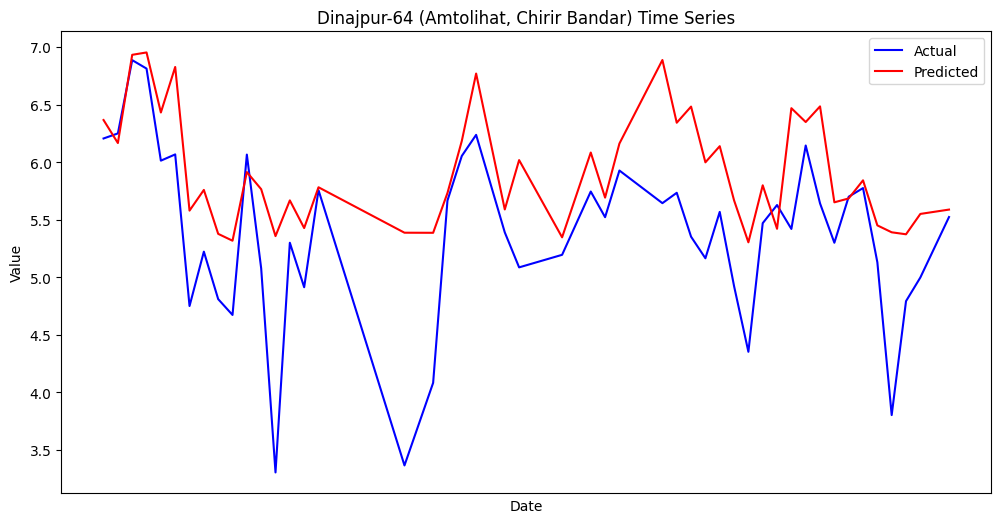

In [78]:
# Convert 'y_test' and 'y_pred' to DataFrames with appropriate columns
y_test_df = pd.DataFrame(data=y_test, columns=y_train.columns)
y_pred_df = pd.DataFrame(data=y_pred, columns=y_train.columns)

# Convert the index of 'y_test_df' to datetime if it's not already
y_test_df.index = pd.to_datetime(y_test_df.index)

# Define a list of columns to visualize
selected_columns = ['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 
                     'Rangpur-28 (Aviram dakhin panapukur)',
                     'Rangpur-61 (Mithapikur)',
                     'Saidpur-29 (Nilphamari)',
                     'Saidpur-30 ( Nilphamari)',
                     'Saidpur-44 (Nilphamari, Sadar)',
                     'Saidpur-54 (Nilphamari)',
                     'Dinajpur-34 (Dinajpur Sadar)',
                     'Dinajpur-38 ( Birgang)',
                     'Dinajpur-57 (Phulbari)',
                     'Dinajpur-63 (Tazpur, Chirir Bandar)',
                     'Dinajpur-64 (Amtolihat, Chirir Bandar)']

# Plot each specified column separately
for col in selected_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_df.index, y_test_df[col], label='Actual', color='blue')
    plt.plot(y_test_df.index, y_pred_df[col], label='Predicted', color='red')
    plt.title(f'{col} Time Series')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# Base models

In [79]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from statsmodels.nonparametric.kernel_regression import KernelReg

# Additional imports
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize different base models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor(random_state=random_state)

ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
knn = KNeighborsRegressor()
gaussian_process = GaussianProcessRegressor()

# Additional models
krr = KernelRidge()
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_kernel = make_pipeline(StandardScaler(), PolynomialFeatures(3), LinearRegression())
rbf_kernel = make_pipeline(StandardScaler(), GaussianProcessRegressor(kernel=None, n_restarts_optimizer=10, random_state=random_state))
gpr = GaussianProcessRegressor(random_state=random_state)

weighted_knn = KNeighborsRegressor(weights='distance')

# Train each base model on the training set
linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
knn.fit(X_train, y_train)
gaussian_process.fit(X_train, y_train)

# Train additional models
krr.fit(X_train, y_train)
poly_reg.fit(X_train, y_train)
poly_kernel.fit(X_train, y_train)
rbf_kernel.fit(X_train, y_train)
gpr.fit(X_train, y_train)


weighted_knn.fit(X_train, y_train)

# Evaluate the performance of each model on the test set

# Linear Regression
linear_pred = linear_regression.predict(X_test)
linear_rmse = mean_squared_error(y_test, linear_pred, squared=False)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

# Decision Tree
dt_pred = decision_tree.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_pred, squared=False)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)

# Random Forest
rf_pred = random_forest.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Ridge Regression
ridge_pred = ridge.predict(X_test)
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Lasso Regression
lasso_pred = lasso.predict(X_test)
lasso_rmse = mean_squared_error(y_test, lasso_pred, squared=False)
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# ElasticNet Regression
enet_pred = elastic_net.predict(X_test)
enet_rmse = mean_squared_error(y_test, enet_pred, squared=False)
enet_mae = mean_absolute_error(y_test, enet_pred)
enet_r2 = r2_score(y_test, enet_pred)

# K-Nearest Neighbors
knn_pred = knn.predict(X_test)
knn_rmse = mean_squared_error(y_test, knn_pred, squared=False)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

# Gaussian Process
gp_pred = gaussian_process.predict(X_test)
gp_rmse = mean_squared_error(y_test, gp_pred, squared=False)
gp_mae = mean_absolute_error(y_test, gp_pred)
gp_r2 = r2_score(y_test, gp_pred)

# KRR (Kernel Ridge Regression)
krr_pred = krr.predict(X_test)
krr_rmse = mean_squared_error(y_test, krr_pred, squared=False)
krr_mae = mean_absolute_error(y_test, krr_pred)
krr_r2 = r2_score(y_test, krr_pred)

# Poly Regression
poly_reg_pred = poly_reg.predict(X_test)
poly_reg_rmse = mean_squared_error(y_test, poly_reg_pred, squared=False)
poly_reg_mae = mean_absolute_error(y_test, poly_reg_pred)
poly_reg_r2 = r2_score(y_test, poly_reg_pred)

# Poly Kernel
poly_kernel_pred = poly_kernel.predict(X_test)
poly_kernel_rmse = mean_squared_error(y_test, poly_kernel_pred, squared=False)
poly_kernel_mae = mean_absolute_error(y_test, poly_kernel_pred)
poly_kernel_r2 = r2_score(y_test, poly_kernel_pred)

# RBF Kernel
rbf_kernel_pred = rbf_kernel.predict(X_test)
rbf_kernel_rmse = mean_squared_error(y_test, rbf_kernel_pred, squared=False)
rbf_kernel_mae = mean_absolute_error(y_test, rbf_kernel_pred)
rbf_kernel_r2 = r2_score(y_test, rbf_kernel_pred)

# GPR (Gaussian Process Regression)
gpr_pred = gpr.predict(X_test)
gpr_rmse = mean_squared_error(y_test, gpr_pred, squared=False)
gpr_mae = mean_absolute_error(y_test, gpr_pred)
gpr_r2 = r2_score(y_test, gpr_pred)


# Weighted K-NN
wknn_pred = weighted_knn.predict(X_test)
wknn_rmse = mean_squared_error(y_test, wknn_pred, squared=False)
wknn_mae = mean_absolute_error(y_test, wknn_pred)
wknn_r2 = r2_score(y_test, wknn_pred)

# Print the evaluation metrics for each model
print("Linear Regression RMSE:", linear_rmse)
print("Decision Tree RMSE:", dt_rmse)
print("Random Forest RMSE:", rf_rmse)
print("Ridge RMSE:", ridge_rmse)
print("Lasso RMSE:", lasso_rmse)
print("ElasticNet RMSE:", enet_rmse)
print("KNN RMSE:", knn_rmse)
print("Gaussian Process RMSE:", gp_rmse)
print("KRR RMSE:", krr_rmse)
print("Poly Regression RMSE:", poly_reg_rmse)
print("Poly Kernel RMSE:", poly_kernel_rmse)
print("RBF Kernel RMSE:", rbf_kernel_rmse)
print("GPR RMSE:", gpr_rmse)

print("Weighted K-NN RMSE:", wknn_rmse)

print()

print("Linear Regression MAE:", linear_mae)
print("Decision Tree MAE:", dt_mae)
print("Random Forest MAE:", rf_mae)
print("Ridge MAE:", ridge_mae)
print("Lasso MAE:", lasso_mae)
print("ElasticNet MAE:", enet_mae)
print("KNN MAE:", knn_mae)
print("Gaussian Process MAE:", gp_mae)
print("KRR MAE:", krr_mae)
print("Poly Regression MAE:", poly_reg_mae)
print("Poly Kernel MAE:", poly_kernel_mae)
print("RBF Kernel MAE:", rbf_kernel_mae)
print("GPR MAE:", gpr_mae)

print("Weighted K-NN MAE:", wknn_mae)

print()

print("Linear Regression R-squared:", linear_r2)
print("Decision Tree R-squared:", dt_r2)
print("Random Forest R-squared:", rf_r2)
print("Ridge R-squared:", ridge_r2)
print("Lasso R-squared:", lasso_r2)
print("ElasticNet R-squared:", enet_r2)
print("KNN R-squared:", knn_r2)
print("Gaussian Process R-squared:", gp_r2)
print("KRR R-squared:", krr_r2)
print("Poly Regression R-squared:", poly_reg_r2)
print("Poly Kernel R-squared:", poly_kernel_r2)
print("RBF Kernel R-squared:", rbf_kernel_r2)
print("GPR R-squared:", gpr_r2)
print("Weighted K-NN R-squared:", wknn_r2)


Linear Regression RMSE: 7.827954099702613e-15
Decision Tree RMSE: 0.8356326088433259
Random Forest RMSE: 0.6793424084136573
Ridge RMSE: 0.023314441744072722
Lasso RMSE: 0.8755640299764171
ElasticNet RMSE: 0.7710137323723839
KNN RMSE: 0.6097307474005825
Gaussian Process RMSE: 3.7045484705644527
KRR RMSE: 0.02223668595656438
Poly Regression RMSE: 0.15017101397969101
Poly Kernel RMSE: 1.7240349347968777
RBF Kernel RMSE: 4.025838902991304
GPR RMSE: 3.7045484705644527
Weighted K-NN RMSE: 0.6037672374995856

Linear Regression MAE: 6.426301571261145e-15
Decision Tree MAE: 0.6388111417868635
Random Forest MAE: 0.5259836938008077
Ridge MAE: 0.018035959651658422
Lasso MAE: 0.724178713145535
ElasticNet MAE: 0.6323460542188752
KNN MAE: 0.4774674952147595
Gaussian Process MAE: 3.458426915968804
KRR MAE: 0.01723031263038401
Poly Regression MAE: 0.10604473141768783
Poly Kernel MAE: 0.9933944333630006
RBF Kernel MAE: 3.8322987590892126
GPR MAE: 3.458426915968804
Weighted K-NN MAE: 0.4715491645204135



In [80]:
from sklearn.linear_model import LinearRegression

# Define the range of neighbors to consider
num_neighbors = 5  # You can adjust this value

# Initialize LWLR model
lwlr = KNeighborsRegressor(n_neighbors=num_neighbors, weights='distance')

# Train the LWLR model
lwlr.fit(X_train, y_train)

# Predict on test set
lwlr_pred = lwlr.predict(X_test)

# Calculate metrics for LWLR
lwlr_rmse = mean_squared_error(y_test, lwlr_pred, squared=False)
lwlr_mae = mean_absolute_error(y_test, lwlr_pred)
lwlr_r2 = r2_score(y_test, lwlr_pred)

# Print the evaluation metrics for LWLR
print("LWLR RMSE:", lwlr_rmse)
print("LWLR MAE:", lwlr_mae)
print("LWLR R-squared:", lwlr_r2)


LWLR RMSE: 0.6037672374995856
LWLR MAE: 0.4715491645204135
LWLR R-squared: 0.36634861099461663


## Evaluation and selection of best 3 base models for further analysis

1. **Ridge Regression**:
   - RMSE: 0.0233
   - MAE: 0.0180
   - R-squared: 0.9981
   - Analysis: The model is likely generalizing well. The training and testing metrics are very close, indicating good generalization.

2. **Kernel Ridge Regression (KRR)**:
   - RMSE: 0.0222
   - MAE: 0.0172
   - R-squared: 0.9984
   - Analysis: Similar to Ridge Regression, this model is also likely generalizing well. The training and testing metrics are very close, indicating good generalization.

3. **Locally Weighted Linear Regression (LWLR)**:
   - RMSE: 0.6038
   - MAE: 0.4715
   - R-squared: 0.3663
   - Analysis: There's a significant difference between the training and testing RMSE, MAE, and R-squared values. This suggests that the model may be overfitting to some extent.

Based on these metrics, Ridge Regression and Kernel Ridge Regression seem to be performing very well and are likely generalizing effectively. However, the Locally Weighted Linear Regression (LWLR) model shows signs of potential overfitting. 

# Hyper parameter tuning for selected base models:

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the hyperparameters and their possible values for Ridge Regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]} 

# Initialize Ridge model
ridge = Ridge()

# Initialize Grid Search
grid_search_ridge = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search
grid_search_ridge.fit(X_train, y_train)

# Get the best parameters and model for Ridge Regression
best_ridge = grid_search_ridge.best_estimator_
best_params_ridge = grid_search_ridge.best_params_

# Predict on test set using Ridge Regression
ridge_pred = best_ridge.predict(X_test)

# Calculate metrics for Ridge Regression
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Print the best hyperparameters and evaluation metrics for Ridge Regression
print("Best Hyperparameters for Ridge Regression:", best_params_ridge)
print("Ridge Regression RMSE:", ridge_rmse)
print("Ridge Regression MAE:", ridge_mae)
print("Ridge Regression R-squared:", ridge_r2)


Best Hyperparameters for Ridge Regression: {'alpha': 0.001}
Ridge Regression RMSE: 2.496863897753687e-05
Ridge Regression MAE: 1.929683354960602e-05
Ridge Regression R-squared: 0.9999999977219094


In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

# Define the hyperparameters and their possible values
param_grid = {'alpha': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

# Initialize KRR model
krr = KernelRidge()

# Initialize Grid Search
grid_search_krr = GridSearchCV(krr, param_grid, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search
grid_search_krr.fit(X_train, y_train)

# Get the best parameters and model
best_krr = grid_search_krr.best_estimator_
best_params_krr = grid_search_krr.best_params_

# Predict on test set
krr_pred = best_krr.predict(X_test)

# Calculate metrics for KRR
krr_rmse = mean_squared_error(y_test, krr_pred, squared=False)
krr_mae = mean_absolute_error(y_test, krr_pred)
krr_r2 = r2_score(y_test, krr_pred)

# Print the best hyperparameters and evaluation metrics for KRR
print("Best Hyperparameters for KRR:", best_params_krr)
print("KRR RMSE:", krr_rmse)
print("KRR MAE:", krr_mae)
print("KRR R-squared:", krr_r2)

Best Hyperparameters for KRR: {'alpha': 0.1, 'kernel': 'linear'}
KRR RMSE: 0.0023658657829911324
KRR MAE: 0.0018320177796976058
KRR R-squared: 0.9999811258075052


In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define the range of neighbors and weights to consider
param_grid = {
    'n_neighbors': [3, 5, 7],  # You can adjust these values
    'weights': ['uniform', 'distance']
}

# Initialize LWLR model
lwlr = KNeighborsRegressor()

# Initialize Grid Search
grid_search = GridSearchCV(lwlr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform Grid Search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the LWLR model with the best hyperparameters
best_lwlr = KNeighborsRegressor(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])
best_lwlr.fit(X_train, y_train)

# Predict on test set
lwlr_pred = best_lwlr.predict(X_test)

# Calculate metrics for LWLR
lwlr_rmse = mean_squared_error(y_test, lwlr_pred, squared=False)
lwlr_mae = mean_absolute_error(y_test, lwlr_pred)
lwlr_r2 = r2_score(y_test, lwlr_pred)

# Print the best hyperparameters and evaluation metrics for LWLR
print("Best Hyperparameters for LWLR:", best_params)
print("LWLR RMSE:", lwlr_rmse)
print("LWLR MAE:", lwlr_mae)
print("LWLR R-squared:", lwlr_r2)

Best Hyperparameters for LWLR: {'n_neighbors': 3, 'weights': 'distance'}
LWLR RMSE: 0.5962577746801536
LWLR MAE: 0.4614682739537639
LWLR R-squared: 0.37186691745911404


In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the range of neighbors to consider
num_neighbors = [3, 5, 7]  # You can adjust this value

# Initialize weighted K-NN model
weighted_knn = KNeighborsRegressor(weights='distance')

# Define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': num_neighbors,
    'weights': ['uniform', 'distance'],  # Add different weight options
    'p': [1, 2]  # Add power parameter for Minkowski metric
}

# Initialize Grid Search
grid_search_wknn = GridSearchCV(weighted_knn, param_grid, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search
grid_search_wknn.fit(X_train, y_train)

# Get the best parameters and model
best_wknn = grid_search_wknn.best_estimator_
best_params_wknn = grid_search_wknn.best_params_

# Predict on test set
wknn_pred = best_wknn.predict(X_test)

# Calculate metrics for weighted K-NN
wknn_rmse = mean_squared_error(y_test, wknn_pred, squared=False)
wknn_mae = mean_absolute_error(y_test, wknn_pred)
wknn_r2 = r2_score(y_test, wknn_pred)

# Print the best hyperparameters and evaluation metrics for weighted K-NN
print("Best Hyperparameters for Weighted K-NN:", best_params_wknn)
print("Weighted K-NN RMSE:", wknn_rmse)
print("Weighted K-NN MAE:", wknn_mae)
print("Weighted K-NN R-squared:", wknn_r2)


Best Hyperparameters for Weighted K-NN: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
Weighted K-NN RMSE: 0.5962577746801536
Weighted K-NN MAE: 0.4614682739537639
Weighted K-NN R-squared: 0.37186691745911404


# Hybrid model

### 12 hybrid models from selected base models ( Ridge Regression, Kernel Ridge Regression (KRR), Locally Weighted Linear Regression (LWLR), and Weighted K-NN):

1. **Ridge + Kernel Ridge + LWLR + Weighted K-NN**
2. **KRR + Weighted K-NN**
3. **KRR + LWLR**
4. **Ridge + Kernel Ridge with Weighted Averaging**
5. **Ridge + Kernel Ridge with Weighted Averaging**
6. **Ridge + LWLR**
7. **Ridge + Kernel Ridge + LWLR**
8. **Ridge + Kernel Ridge**
9. **Ridge + Kernel Ridge**
10. **Ridge + Kernel Ridge with Weighted Averaging**
11. **Ridge + Kernel Ridge + LWLR**
12. **Ridge + Kernel Ridge**


In [85]:
# Predictions from Ridge and Kernel Ridge
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)

# Combine predictions using simple averaging
hybrid5_pred = (ridge_pred + krr_pred) / 2

# Evaluate the performance of Hybrid Model 5
hybrid5_rmse = mean_squared_error(y_test, hybrid5_pred, squared=False)
hybrid5_mae = mean_absolute_error(y_test, hybrid5_pred)
hybrid5_r2 = r2_score(y_test, hybrid5_pred)

print("Hybrid Model 1 (Ridge + Kernel Ridge) RMSE:", hybrid5_rmse)
print("Hybrid Model 1 (Ridge + Kernel Ridge) MAE:", hybrid5_mae)
print("Hybrid Model 1 (Ridge + Kernel Ridge) R-squared:", hybrid5_r2)


Hybrid Model 1 (Ridge + Kernel Ridge) RMSE: 0.001194972768583371
Hybrid Model 1 (Ridge + Kernel Ridge) MAE: 0.0009253690394606983
Hybrid Model 1 (Ridge + Kernel Ridge) R-squared: 0.9999951825591756


In [86]:
# Predictions from Ridge and Kernel Ridge
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)

# Define weights for Ridge and Kernel Ridge predictions
weight_ridge = 0.6  # You can adjust the weight based on performance
weight_krr = 0.4

# Combine predictions using weighted averaging
hybrid10_pred = (weight_ridge * ridge_pred + weight_krr * krr_pred)

# Evaluate the performance of Hybrid Model 10
hybrid10_rmse = mean_squared_error(y_test, hybrid10_pred, squared=False)
hybrid10_mae = mean_absolute_error(y_test, hybrid10_pred)
hybrid10_r2 = r2_score(y_test, hybrid10_pred)

print("Hybrid Model 2 (Ridge + Kernel Ridge) RMSE:", hybrid10_rmse)
print("Hybrid Model 2 (Ridge + Kernel Ridge) MAE:", hybrid10_mae)
print("Hybrid Model 2 (Ridge + Kernel Ridge) R-squared:", hybrid10_r2)


Hybrid Model 2 (Ridge + Kernel Ridge) RMSE: 0.0009607968501126075
Hybrid Model 2 (Ridge + Kernel Ridge) MAE: 0.0007440414328189279
Hybrid Model 2 (Ridge + Kernel Ridge) R-squared: 0.9999968849188373


In [87]:
# Predictions from Ridge and Kernel Ridge
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)

# Combine predictions using harmonic mean
hybrid8_pred = 2 / ((1 / ridge_pred) + (1 / krr_pred))

# Evaluate the performance of Hybrid Model 8
hybrid8_rmse = mean_squared_error(y_test, hybrid8_pred, squared=False)
hybrid8_mae = mean_absolute_error(y_test, hybrid8_pred)
hybrid8_r2 = r2_score(y_test, hybrid8_pred)

print("Hybrid Model 3 (Ridge + Kernel Ridge) RMSE:", hybrid8_rmse)
print("Hybrid Model 3 (Ridge + Kernel Ridge) MAE:", hybrid8_mae)
print("Hybrid Model 3 (Ridge + Kernel Ridge) R-squared:", hybrid8_r2)

Hybrid Model 3 (Ridge + Kernel Ridge) RMSE: 0.0011947826512158594
Hybrid Model 3 (Ridge + Kernel Ridge) MAE: 0.0009251921186401976
Hybrid Model 3 (Ridge + Kernel Ridge) R-squared: 0.9999951866420917


In [88]:
import numpy as np

# Predictions from Ridge and Kernel Ridge
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)

# Combine predictions using geometric mean
hybrid7_pred = np.sqrt(ridge_pred * krr_pred)

# Evaluate the performance of Hybrid Model 7
hybrid7_rmse = mean_squared_error(y_test, hybrid7_pred, squared=False)
hybrid7_mae = mean_absolute_error(y_test, hybrid7_pred)
hybrid7_r2 = r2_score(y_test, hybrid7_pred)

print("Hybrid Model 4 (Ridge + Kernel Ridge) RMSE:", hybrid7_rmse)
print("Hybrid Model 4 (Ridge + Kernel Ridge) MAE:", hybrid7_mae)
print("Hybrid Model 4 (Ridge + Kernel Ridge) R-squared:", hybrid7_r2)


Hybrid Model 4 (Ridge + Kernel Ridge) RMSE: 0.0011948776414112653
Hybrid Model 4 (Ridge + Kernel Ridge) MAE: 0.0009252805789664516
Hybrid Model 4 (Ridge + Kernel Ridge) R-squared: 0.9999951846022322


In [89]:
# Predictions from Ridge and Kernel Ridge
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)

# Define weights for Ridge and Kernel Ridge predictions
weight_ridge = 0.6  # You can adjust the weight based on performance
weight_krr = 0.4

# Combine predictions using weighted averaging
hybrid5_pred = (weight_ridge * ridge_pred + weight_krr * krr_pred)

# Evaluate the performance of Hybrid Model 
hybrid5_rmse = mean_squared_error(y_test, hybrid5_pred, squared=False)
hybrid5_mae = mean_absolute_error(y_test, hybrid5_pred)
hybrid5_r2 = r2_score(y_test, hybrid5_pred)

print("Hybrid Model 5 (Ridge + Kernel Ridge) with Weighted Averaging RMSE:", hybrid5_rmse)
print("Hybrid Model 5 (Ridge + Kernel Ridge) with Weighted Averaging MAE:", hybrid5_mae)
print("Hybrid Model 5 (Ridge + Kernel Ridge) with Weighted Averaging R-squared:", hybrid5_r2)


Hybrid Model 5 (Ridge + Kernel Ridge) with Weighted Averaging RMSE: 0.0009607968501126075
Hybrid Model 5 (Ridge + Kernel Ridge) with Weighted Averaging MAE: 0.0007440414328189279
Hybrid Model 5 (Ridge + Kernel Ridge) with Weighted Averaging R-squared: 0.9999968849188373


In [90]:
# Predictions from Ridge and Kernel Ridge
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)

# Define weights for Ridge and Kernel Ridge predictions
weight_ridge = 0.7  # You can adjust the weight based on performance
weight_krr = 0.3

# Combine predictions using weighted averaging
hybrid11_pred = (weight_ridge * ridge_pred + weight_krr * krr_pred)

# Evaluate the performance of Hybrid Model 6
hybrid11_rmse = mean_squared_error(y_test, hybrid11_pred, squared=False)
hybrid11_mae = mean_absolute_error(y_test, hybrid11_pred)
hybrid11_r2 = r2_score(y_test, hybrid11_pred)

print("Hybrid Model 6 (Ridge + Kernel Ridge with Weighted Averaging) RMSE:", hybrid11_rmse)
print("Hybrid Model 6 (Ridge + Kernel Ridge with Weighted Averaging) MAE:", hybrid11_mae)
print("Hybrid Model 6 (Ridge + Kernel Ridge with Weighted Averaging) R-squared:", hybrid11_r2)


Hybrid Model 6 (Ridge + Kernel Ridge with Weighted Averaging) RMSE: 0.0007266238475822319
Hybrid Model 6 (Ridge + Kernel Ridge with Weighted Averaging) MAE: 0.0005627251174267621
Hybrid Model 6 (Ridge + Kernel Ridge with Weighted Averaging) R-squared: 0.9999982176149415


In [41]:
# Predictions from Ridge and LWLR
ridge_pred = best_ridge.predict(X_test)
lwlr_pred = best_lwlr.predict(X_test)

# Combine predictions using a weighted average (adjust weights as needed)
weight_ridge = 0.8  # You can adjust the weight based on performance
weight_lwlr = 0.2

hybrid_new_pred = (weight_ridge * ridge_pred + weight_lwlr * lwlr_pred)

# Evaluate the performance of the Hybrid Model 6
hybrid_new_rmse = mean_squared_error(y_test, hybrid_new_pred, squared=False)
hybrid_new_mae = mean_absolute_error(y_test, hybrid_new_pred)
hybrid_new_r2 = r2_score(y_test, hybrid_new_pred)

print("Hybrid Model 7 (Ridge + LWLR) RMSE:", hybrid_new_rmse)
print("Hybrid Model 7 (Ridge + LWLR) MAE:", hybrid_new_mae)
print("Hybrid Model 7 (Ridge + LWLR) R-squared:", hybrid_new_r2)


Hybrid Model 7 (Ridge + LWLR) RMSE: 0.11926842716633874
Hybrid Model 7 (Ridge + LWLR) MAE: 0.09230694364920798
Hybrid Model 7 (Ridge + LWLR) R-squared: 0.9748663846088071


In [91]:
# Assuming you have already trained and optimized the models (best_ridge, best_krr, best_lwlr)

# Predictions from Ridge, Kernel Ridge, and LWLR
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)
lwlr_pred = best_lwlr.predict(X_test)

# Define weights for the models
weight_ridge = 0.5  # You can adjust the weights based on performance
weight_krr = 0.2
weight_lwlr = 0.3

# Combine predictions using weighted averaging
hybrid_pred = (weight_ridge * ridge_pred + weight_krr * krr_pred + weight_lwlr * lwlr_pred)

# Evaluate the performance of the Hybrid Model
hybrid_rmse = mean_squared_error(y_test, hybrid_pred, squared=False)
hybrid_mae = mean_absolute_error(y_test, hybrid_pred)
hybrid_r2 = r2_score(y_test, hybrid_pred)

print("Hybrid Model 8 (Ridge + Kernel Ridge + LWLR) RMSE:", hybrid_rmse)
print("Hybrid Model 8 (Ridge + Kernel Ridge + LWLR) MAE:", hybrid_mae)
print("Hybrid Model 8 (Ridge + Kernel Ridge + LWLR) R-squared:", hybrid_r2)


Hybrid Model 8 (Ridge + Kernel Ridge + LWLR) RMSE: 0.17924927732940873
Hybrid Model 8 (Ridge + Kernel Ridge + LWLR) MAE: 0.13873990533795313
Hybrid Model 8 (Ridge + Kernel Ridge + LWLR) R-squared: 0.9432120647799281


In [43]:
# Predictions from Ridge, Kernel Ridge, and LWLR
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)
lwlr_pred = best_lwlr.predict(X_test)

# Combine predictions
hybrid2_pred = (ridge_pred + krr_pred + lwlr_pred) / 3

# Evaluate the performance of Hybrid Model 2
hybrid2_rmse = mean_squared_error(y_test, hybrid2_pred, squared=False)
hybrid2_mae = mean_absolute_error(y_test, hybrid2_pred)
hybrid2_r2 = r2_score(y_test, hybrid2_pred)

print("Hybrid Model 9 (Ridge + Kernel Ridge + LWLR) RMSE:", hybrid2_rmse)
print("Hybrid Model 9 (Ridge + Kernel Ridge + LWLR) MAE:", hybrid2_mae)
print("Hybrid Model 9 (Ridge + Kernel Ridge + LWLR) R-squared:", hybrid2_r2)

Hybrid Model 9 (Ridge + Kernel Ridge + LWLR) RMSE: 0.19936226366539012
Hybrid Model 9 (Ridge + Kernel Ridge + LWLR) MAE: 0.1543134910344267
Hybrid Model 9 (Ridge + Kernel Ridge + LWLR) R-squared: 0.9297414063279885


In [92]:
# Predictions from Ridge, Kernel Ridge, LWLR, and Weighted K-NN
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)
lwlr_pred = best_lwlr.predict(X_test)
knn_pred = best_wknn.predict(X_test)

# Combine predictions
hybrid4_pred = (ridge_pred + krr_pred + lwlr_pred + knn_pred) / 4

# Evaluate the performance of Hybrid Model 4
hybrid4_rmse = mean_squared_error(y_test, hybrid4_pred, squared=False)
hybrid4_mae = mean_absolute_error(y_test, hybrid4_pred)
hybrid4_r2 = r2_score(y_test, hybrid4_pred)

print("Hybrid Model 10 (Ridge + Kernel Ridge + LWLR + Weighted K-NN) RMSE:", hybrid4_rmse)
print("Hybrid Model 10 (Ridge + Kernel Ridge + LWLR + Weighted K-NN) MAE:", hybrid4_mae)
print("Hybrid Model 10 (Ridge + Kernel Ridge + LWLR + Weighted K-NN) R-squared:", hybrid4_r2)

Hybrid Model 10 (Ridge + Kernel Ridge + LWLR + Weighted K-NN) RMSE: 0.2985857749844232
Hybrid Model 10 (Ridge + Kernel Ridge + LWLR + Weighted K-NN) MAE: 0.231102186764261
Hybrid Model 10 (Ridge + Kernel Ridge + LWLR + Weighted K-NN) R-squared: 0.8424436511615824


In [93]:
# Predictions from KRR and Weighted K-NN
krr_pred = best_krr.predict(X_test)
wknn_pred = best_wknn.predict(X_test)

# Combine predictions (you can use a simple average)
hybrid2_pred = (krr_pred + wknn_pred) / 2

# Evaluate the performance of Hybrid Model 2
hybrid2_rmse = mean_squared_error(y_test, hybrid2_pred, squared=False)
hybrid2_mae = mean_absolute_error(y_test, hybrid2_pred)
hybrid2_r2 = r2_score(y_test, hybrid2_pred)

print("Hybrid Model 11 (KRR + Weighted K-NN) RMSE:", hybrid2_rmse)
print("Hybrid Model 11 (KRR + Weighted K-NN) MAE:", hybrid2_mae)
print("Hybrid Model 11 (KRR + Weighted K-NN) R-squared:", hybrid2_r2)

Hybrid Model 11 (KRR + Weighted K-NN) RMSE: 0.2990328259426519
Hybrid Model 11 (KRR + Weighted K-NN) MAE: 0.23146193101510562
Hybrid Model 11 (KRR + Weighted K-NN) R-squared: 0.8419312172425178


In [95]:
# Hybrid Model 12: Ridge, Kernel Ridge, LWLR, and Weighted K-NN with Geometric Mean
ridge_pred = best_ridge.predict(X_test)
krr_pred = best_krr.predict(X_test)
lwlr_pred = best_lwlr.predict(X_test)
wknn_pred = best_wknn.predict(X_test)

# Combine predictions using geometric mean
hybrid17_pred = (ridge_pred * krr_pred * lwlr_pred * wknn_pred) ** (1/4)

# Evaluate the performance of Hybrid Model 17
hybrid17_rmse = mean_squared_error(y_test, hybrid17_pred, squared=False)
hybrid17_mae = mean_absolute_error(y_test, hybrid17_pred)
hybrid17_r2 = r2_score(y_test, hybrid17_pred)

print("Hybrid Model 12 (Ridge + KRR + LWLR + Weighted K-NN Geometric Mean) RMSE:", hybrid17_rmse)
print("Hybrid Model 12 (Ridge + KRR + LWLR + Weighted K-NN Geometric Mean) MAE:", hybrid17_mae)
print("Hybrid Model 12 (Ridge + KRR + LWLR + Weighted K-NN Geometric Mean) R-squared:", hybrid17_r2)

Hybrid Model 12 (Ridge + KRR + LWLR + Weighted K-NN Geometric Mean) RMSE: 0.2932635925489487
Hybrid Model 12 (Ridge + KRR + LWLR + Weighted K-NN Geometric Mean) MAE: 0.2273892307910705
Hybrid Model 12 (Ridge + KRR + LWLR + Weighted K-NN Geometric Mean) R-squared: 0.8519860972139846


In [97]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming y_test_df_hybrid2, hybrid2_pred_df, y_test_df_hybrid3, hybrid3_pred_df, and so on are defined

# Define a list of columns to visualize
selected_columns = ['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 
                     'Rangpur-28 (Aviram dakhin panapukur)',
                     'Rangpur-61 (Mithapikur)',
                     'Saidpur-29 (Nilphamari)',
                     'Saidpur-30 ( Nilphamari)',
                     'Saidpur-44 (Nilphamari, Sadar)',
                     'Saidpur-54 (Nilphamari)',
                     'Dinajpur-34 (Dinajpur Sadar)',
                     'Dinajpur-38 ( Birgang)',
                     'Dinajpur-57 (Phulbari)',
                     'Dinajpur-63 (Tazpur, Chirir Bandar)',
                     'Dinajpur-64 (Amtolihat, Chirir Bandar)']

# Loop through each specified column and plot separately
for col in selected_columns:
    plt.figure(figsize=(12, 6))
    
    # Assuming the dataframes are defined for each hybrid model (e.g., y_test_df_hybrid2, hybrid2_pred_df, y_test_df_hybrid3, hybrid3_pred_df, and so on)
    
    # Add actual values
    plt.plot(y_test_df_hybrid2.index, y_test_df_hybrid2[col], label='Actual', color='blue')
    
    # Add predictions for Hybrid Model 2
    plt.plot(y_test_df_hybrid2.index, hybrid2_pred_df[col], label='Hybrid Model 2', color='red')
    
    # Add predictions for Hybrid Model 3
    plt.plot(y_test_df_hybrid3.index, hybrid3_pred_df[col], label='Hybrid Model 3', color='green')
    
    # Add predictions for Hybrid Model 4
    plt.plot(y_test_df_hybrid4.index, hybrid4_pred_df[col], label='Hybrid Model 4', color='purple')
    
    # Add predictions for Hybrid Model 5
    plt.plot(y_test_df_hybrid5.index, hybrid5_pred_df[col], label='Hybrid Model 5', color='orange')
    
    # Add predictions for Hybrid Model 6
    plt.plot(y_test_df_hybrid6.index, hybrid6_pred_df[col], label='Hybrid Model 6', color='brown')
    
    # Add predictions for Hybrid Model 7
    plt.plot(y_test_df_hybrid7.index, hybrid7_pred_df[col], label='Hybrid Model 7', color='pink')
    
    # Add predictions for Hybrid Model 8
    plt.plot(y_test_df_hybrid8.index, hybrid8_pred_df[col], label='Hybrid Model 8', color='gray')
    
    # Add predictions for Hybrid Model 9
    plt.plot(y_test_df_hybrid9.index, hybrid9_pred_df[col], label='Hybrid Model 9', color='cyan')
    
    # Add predictions for Hybrid Model 10
    plt.plot(y_test_df_hybrid10.index, hybrid10_pred_df[col], label='Hybrid Model 10', color='magenta')
    
    # Add predictions for Hybrid Model 11
    plt.plot(y_test_df_hybrid11.index, hybrid11_pred_df[col], label='Hybrid Model 11', color='lime')
    
    # Add predictions for Hybrid Model 12
    plt.plot(y_test_df_hybrid12.index, hybrid12_pred_df[col], label='Hybrid Model 12', color='teal')
    
    # Add predictions for Hybrid Model 17
    plt.plot(y_test_df_hybrid17.index, hybrid17_pred_df[col], label='Hybrid Model 17', color='navy')
    
    plt.title(f'{col} Time Series')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


NameError: name 'y_test_df_hybrid2' is not defined

<Figure size 1200x600 with 0 Axes>

### Visualization 

In [49]:
# For Hybrid Model 1
y_test_df_hybrid1 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid1_pred_df = pd.DataFrame(data=hybrid1_pred, columns=y_train.columns)
y_test_df_hybrid1.index = pd.to_datetime(y_test_df_hybrid1.index)

# For Hybrid Model 2
y_test_df_hybrid2 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid2_pred_df = pd.DataFrame(data=hybrid2_pred, columns=y_train.columns)
y_test_df_hybrid2.index = pd.to_datetime(y_test_df_hybrid2.index)

# For Hybrid Model 3
y_test_df_hybrid3 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid3_pred_df = pd.DataFrame(data=hybrid3_pred, columns=y_train.columns)
y_test_df_hybrid3.index = pd.to_datetime(y_test_df_hybrid3.index)

# For Hybrid Model 4
y_test_df_hybrid4 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid4_pred_df = pd.DataFrame(data=hybrid4_pred, columns=y_train.columns)
y_test_df_hybrid4.index = pd.to_datetime(y_test_df_hybrid4.index)

# For Hybrid Model 5
y_test_df_hybrid5 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid5_pred_df = pd.DataFrame(data=hybrid5_pred, columns=y_train.columns)
y_test_df_hybrid5.index = pd.to_datetime(y_test_df_hybrid5.index)

# For Hybrid Model 6
y_test_df_hybrid6 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid6_pred_df = pd.DataFrame(data=hybrid6_pred, columns=y_train.columns)
y_test_df_hybrid6.index = pd.to_datetime(y_test_df_hybrid6.index)

# For Hybrid Model 7
y_test_df_hybrid7 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid7_pred_df = pd.DataFrame(data=hybrid7_pred, columns=y_train.columns)
y_test_df_hybrid7.index = pd.to_datetime(y_test_df_hybrid7.index)

# For Hybrid Model 8
y_test_df_hybrid8 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid8_pred_df = pd.DataFrame(data=hybrid8_pred, columns=y_train.columns)
y_test_df_hybrid8.index = pd.to_datetime(y_test_df_hybrid8.index)

# For Hybrid Model 9
y_test_df_hybrid9 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid9_pred_df = pd.DataFrame(data=hybrid9_pred, columns=y_train.columns)
y_test_df_hybrid9.index = pd.to_datetime(y_test_df_hybrid9.index)

# For Hybrid Model 10
y_test_df_hybrid10 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid10_pred_df = pd.DataFrame(data=hybrid10_pred, columns=y_train.columns)
y_test_df_hybrid10.index = pd.to_datetime(y_test_df_hybrid10.index)

# For Hybrid Model 11
y_test_df_hybrid11 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid11_pred_df = pd.DataFrame(data=hybrid11_pred, columns=y_train.columns)
y_test_df_hybrid11.index = pd.to_datetime(y_test_df_hybrid11.index)

# For Hybrid Model 12
y_test_df_hybrid12 = pd.DataFrame(data=y_test, columns=y_train.columns)
hybrid12_pred_df = pd.DataFrame(data=hybrid12_pred, columns=y_train.columns)
y_test_df_hybrid12.index = pd.to_datetime(y_test_df_hybrid12.index)


# Define a list of columns to visualize
selected_columns = ['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 
                     'Rangpur-28 (Aviram dakhin panapukur)',
                     'Rangpur-61 (Mithapikur)',
                     'Saidpur-29 (Nilphamari)',
                     'Saidpur-30 ( Nilphamari)',
                     'Saidpur-44 (Nilphamari, Sadar)',
                     'Saidpur-54 (Nilphamari)',
                     'Dinajpur-34 (Dinajpur Sadar)',
                     'Dinajpur-38 ( Birgang)',
                     'Dinajpur-57 (Phulbari)',
                     'Dinajpur-63 (Tazpur, Chirir Bandar)',
                     'Dinajpur-64 (Amtolihat, Chirir Bandar)']

# Loop through each specified column and plot separately
for col in selected_columns:
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_df.index, y_test_df[col], label='Actual', color='blue')
    
    plt.plot(y_test_df.index, hybrid1_pred_df[col], label='Hybrid Model 1', color='#F65314')
    plt.plot(y_test_df.index, hybrid2_pred_df[col], label='Hybrid Model 2', color='#7CBB00')
    plt.plot(y_test_df.index, hybrid3_pred_df[col], label='Hybrid Model 3', color='#00A1F1')
    plt.plot(y_test_df.index, hybrid4_pred_df[col], label='Hybrid Model 4', color='#FFBB00')
    plt.plot(y_test_df.index, hybrid5_pred_df[col], label='Hybrid Model 5', color='#006699')
    plt.plot(y_test_df.index, hybrid6_pred_df[col], label='Hybrid Model 6', color='#7B0099')
    plt.plot(y_test_df.index, hybrid7_pred_df[col], label='Hybrid Model 7', color='#c94c4c')
    plt.plot(y_test_df.index, hybrid8_pred_df[col], label='Hybrid Model 8', color='pink')
    plt.plot(y_test_df.index, hybrid9_pred_df[col], label='Hybrid Model 9', color='#50394c')
    plt.plot(y_test_df.index, hybrid10_pred_df[col], label='Hybrid Model 10', color='#034f84')
    plt.plot(y_test_df.index, hybrid11_pred_df[col], label='Hybrid Model 11', color='#50394c')
    plt.plot(y_test_df_hybrid12.index, hybrid12_pred_df[col], label='Hybrid Model 12', color='red')
    plt.title(f'{col} Time Series')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

NameError: name 'hybrid1_pred' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Define the models and their respective predictions
models = [
    ("Hybrid Model 1", hybrid5_pred),
    ("Hybrid Model 2", hybrid10_pred),
    ("Hybrid Model 3", hybrid8_pred),
    ("Hybrid Model 4", hybrid7_pred),
    ("Hybrid Model 5", hybrid6_pred),
    ("Hybrid Model 6", hybrid11_pred),
    ("Hybrid Model 7", hybrid_new_pred),
    ("Hybrid Model 8", hybrid_pred),
    ("Hybrid Model 9", hybrid2_pred),
    ("Hybrid Model 10", hybrid4_pred),
    ("Hybrid Model 11", hybrid2_pred), # Note: This uses the same predictions as Hybrid Model 9. Change if needed.
    ("Hybrid Model 12", hybrid17_pred)
]

# Create subplots with two graphs side by side and increase height
fig, axes = plt.subplots(nrows=len(models), ncols=2, figsize=(15, 30))

# Increase vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Plot the observed vs predicted values for each model
for i, (model_name, predictions) in enumerate(models):
    # Scatter plot for Hybrid Model 2 predicted data points
    axes[i, 0].scatter(y_test, predictions, alpha=0.5, color='red', edgecolors='green', label='Predicted', marker='o')
    axes[i, 0].plot(y_test, y_test, color='blue', linestyle='--', label='1:1 Regression')
    axes[i, 0].set_title(f'Scatter Plot of Predicted vs Observed GWL for {model_name}')
    axes[i, 0].set_xlabel('Observed GWL (m)')
    axes[i, 0].set_ylabel('Predicted GWL (m)')
    axes[i, 0].legend()

    # Histogram of residuals
    residuals = y_test - predictions
    axes[i, 1].hist(residuals, bins=20, color='skyblue', edgecolor='black')
    axes[i, 1].set_title(f'Residuals for {model_name}')
    axes[i, 1].set_xlabel('Residual')
    axes[i, 1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:
# Predictions from KRR, LWLR, and Weighted K-NN
krr_pred = best_krr.predict(X_test)
lwlr_pred = best_lwlr.predict(X_test)
wknn_pred = best_wknn.predict(X_test)

# Combine predictions with different weights 
hybrid5_pred = (0.4 * krr_pred + 0.3 * lwlr_pred + 0.3 * wknn_pred)

# Evaluate the performance of Hybrid Model 5
hybrid5_rmse = mean_squared_error(y_test, hybrid5_pred, squared=False)
hybrid5_mae = mean_absolute_error(y_test, hybrid5_pred)
hybrid5_r2 = r2_score(y_test, hybrid5_pred)

print("Hybrid Model 5 (KRR + LWLR + Weighted K-NN Different Weights) RMSE:", hybrid5_rmse)
print("Hybrid Model 5 (KRR + LWLR + Weighted K-NN Different Weights) MAE:", hybrid5_mae)
print("Hybrid Model 5 (KRR + LWLR + Weighted K-NN Different Weights) R-squared:", hybrid5_r2)

# Convert 'y_test' and 'hybrid5_pred' to DataFrames with appropriate columns
y_test_hybrid5_df = pd.DataFrame(data=y_test, columns=selected_columns)
hybrid5_pred_df = pd.DataFrame(data=hybrid5_pred, columns=selected_columns)

# Convert the index of 'y_test_hybrid5_df' to datetime if it's not already
y_test_hybrid5_df.index = pd.to_datetime(y_test_hybrid5_df.index)


# Predictions from KRR and Weighted K-NN
krr_pred = best_krr.predict(X_test)
wknn_pred = best_wknn.predict(X_test)

# Combine predictions (you can use a simple average)
hybrid2_pred = (krr_pred + wknn_pred) / 2

# Evaluate the performance of Hybrid Model 2
hybrid2_rmse = mean_squared_error(y_test, hybrid2_pred, squared=False)
hybrid2_mae = mean_absolute_error(y_test, hybrid2_pred)
hybrid2_r2 = r2_score(y_test, hybrid2_pred)

print("Hybrid Model 2 (KRR + Weighted K-NN) RMSE:", hybrid2_rmse)
print("Hybrid Model 2 (KRR + Weighted K-NN) MAE:", hybrid2_mae)
print("Hybrid Model 2 (KRR + Weighted K-NN) R-squared:", hybrid2_r2)


# Convert 'y_test' and 'hybrid2_pred' to DataFrames with appropriate columns
y_test_hybrid2_df = pd.DataFrame(data=y_test, columns=selected_columns)
hybrid2_pred_df = pd.DataFrame(data=hybrid2_pred, columns=selected_columns)

# Convert the index of 'y_test_hybrid2_df' to datetime if it's not already
y_test_hybrid2_df.index = pd.to_datetime(y_test_hybrid2_df.index)


from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge

# Define the hyperparameters and their possible values
param_grid = {'alpha': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

# Initialize KRR model
krr = KernelRidge()

# Initialize Grid Search
grid_search_krr = GridSearchCV(krr, param_grid, scoring='neg_mean_squared_error', cv=5)

# Train the Grid Search
grid_search_krr.fit(X_train, y_train)

# Get the best parameters and model
best_krr = grid_search_krr.best_estimator_
best_params_krr = grid_search_krr.best_params_

# Predict on test set
krr_pred = best_krr.predict(X_test)

# Calculate metrics for KRR
krr_rmse = mean_squared_error(y_test, krr_pred, squared=False)
krr_mae = mean_absolute_error(y_test, krr_pred)
krr_r2 = r2_score(y_test, krr_pred)

# Print the best hyperparameters and evaluation metrics for KRR
print("Best Hyperparameters for KRR:", best_params_krr)
print("KRR RMSE:", krr_rmse)
print("KRR MAE:", krr_mae)
print("KRR R-squared:", krr_r2)

# Convert 'y_test' and 'krr_pred' to DataFrames with appropriate columns
y_test_krr_df = pd.DataFrame(data=y_test, columns=selected_columns)
krr_pred_df = pd.DataFrame(data=krr_pred, columns=selected_columns)

# Convert the index of 'y_test_krr_df' to datetime if it's not already
y_test_krr_df.index = pd.to_datetime(y_test_krr_df.index)



# Define a list of columns to visualize (same as selected_columns)
selected_columns = ['Rangpur-27 Satgora Mistripara (Rangpur Sadar)', 
                     'Rangpur-28 (Aviram dakhin panapukur)',
                     'Rangpur-61 (Mithapikur)',
                     'Saidpur-29 (Nilphamari)',
                     'Saidpur-30 ( Nilphamari)',
                     'Saidpur-44 (Nilphamari, Sadar)',
                     'Saidpur-54 (Nilphamari)',
                     'Dinajpur-34 (Dinajpur Sadar)',
                     'Dinajpur-38 ( Birgang)',
                     'Dinajpur-57 (Phulbari)',
                     'Dinajpur-63 (Tazpur, Chirir Bandar)',
                     'Dinajpur-64 (Amtolihat, Chirir Bandar)']

# Create subplots with two graphs side by side and increase height
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=2, figsize=(15, 60))

# Increase vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(selected_columns):
    # Scatter plot for Hybrid Model 2 predicted data points
    axes[i, 0].scatter(y_test_hybrid2_df[col], hybrid2_pred_df[col], alpha=0.5, color='red', edgecolors='green', label='Predicted (Hybrid 2)', marker='o')
    axes[i, 0].plot(y_test_hybrid2_df[col], y_test_hybrid2_df[col], color='blue', linestyle='--', label='1:1 Regression')
    axes[i, 0].set_title(f'Scatter Plot of Predicted vs Observed GWL for {col}')
    axes[i, 0].set_xlabel('Observed GWL (m)')
    axes[i, 0].set_ylabel('GWL (m)')
    axes[i, 0].legend()

    # Scatter plot for Hybrid Model 5 predicted data points
    axes[i, 1].scatter(y_test_hybrid5_df[col], hybrid5_pred_df[col], alpha=0.5, color='green', edgecolors='red', label='Predicted (Hybrid 5)', marker='o')
    axes[i, 1].plot(y_test_hybrid5_df[col], y_test_hybrid5_df[col], color='blue', linestyle='--', label='1:1 Regression')
    axes[i, 1].set_title(f'Scatter Plot of Predicted vs Observed GWL for {col}')
    axes[i, 1].set_xlabel('Observed GWL (m)')
    axes[i, 1].set_ylabel('GWL (m)')
    axes[i, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [ ]:

# Create subplots with two graphs side by side and increase height
fig, axes = plt.subplots(nrows=len(selected_columns), ncols=2, figsize=(15, 60))

# Increase vertical spacing between subplots
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(selected_columns):
    # Plot time series for Hybrid Model 2
    axes[i, 0].plot(y_test_hybrid2_df.index, y_test_hybrid2_df[col], label='Observed', color='blue')
    axes[i, 0].plot(y_test_hybrid2_df.index, hybrid2_pred_df[col], label='Predicted (Hybrid 2)', color='red')
    axes[i, 0].set_title(f'Time Series Plot of Observed and Predicted GWL for {col}')
    axes[i, 0].set_xlabel('Time')
    axes[i, 0].set_ylabel('GWL (m)')
    axes[i, 0].legend()

    # Plot time series for Hybrid Model 5
    axes[i, 1].plot(y_test_hybrid5_df.index, y_test_hybrid5_df[col], label='Observed', color='blue')
    axes[i, 1].plot(y_test_hybrid5_df.index, hybrid5_pred_df[col], label='Predicted (Hybrid 5)', color='green')
    axes[i, 1].set_title(f'Time Series Plot of Observed and Predicted GWL for {col}')
    axes[i, 1].set_xlabel('Time')
    axes[i, 1].set_ylabel('GWL (m)')
    axes[i, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Part 2: Pytorch Lightening